<a href="https://colab.research.google.com/github/FranMoretti/Proyecto_Final_Data_Science/blob/main/Proyecto_Final_Data_Science_(F_Moretti).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto final Data Science**

## *Objetivo y consideraciones iniciales*

El presente proyecto tiene como input una base de datos de una compañía del rubro retail. El objetivo de este trabajo será predecir qué clientes aceptarán un ofrecimiento de productos o servicios en la camapaña de marketing a realizar. Para ello contamos con información histórica de 5 (cinco) campañas previas, hábitos de consumo de cada cliente, como así también otros datos de interés como ser fecha de nacimiento, nivel educativo, antigüedad como cliente, estado civil, ingresos, etc. 

Nuestra variable target será 'Response', la cual se corresponde con si el cliente aceptó o no en la última campaña realizada, la sexta (6ta). De esta manera, la compañía busca minimizar costos y maximizar ingresos, focalizando próximas campañas sobre aquellos clientes con mayor probabilidad de compra.

# **Import de librerías**

In [ ]:
#Importo las librerías necesarias para realizar el análisis exploratorio de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Adquisition**

In [ ]:
#Le doy acceso al drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Leo el .csv y lo asigno a 'df'
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto Final/marketing_campaign.csv', sep=';')

# **Exploratory Data Analysis & Data Wrangling**


##Estadísitcas descriptivas básicas

**A continuación se transcriben los significados de cada variable de este dataset para su correcto entendimiento:**

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s household

Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase

**Fuente:** https://www.kaggle.com/rodsaldanha/arketing-campaign

(O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.)

In [ ]:
#Visualizo los encabezados de 'df'
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Ahora los últimos registros
df.tail() 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
#Visualizo que tipo de objeto es 'df', a lo cual lo reconoce como dataframe
type(df)

pandas.core.frame.DataFrame

In [ ]:
#Visualizo las dimensiones de 'df'', observando que cuenta con 2240 filas y 29 variables
df.shape

(2240, 29)

In [ ]:
#Visualizo los tipos de datos, observando que contiene mayormente variables enteras, excepto por 3 de tipo 'objeto' y 1 numérica con decimales.
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
#Visualizo la cantidad de registros por cada variable. Todas tienen 2.240, excepto por 'Income', a la cual le faltan 24 valores. 
#Estamos en presencia de los denominados 'missing values'.
df.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [ ]:
#Aquí lo vuelvo a chequear
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#Visualizo un poco más de info de 'df'. Donde se observa que no habría registros nulos. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Corroboro si existe 'ID' cliente duplicado, ya que no debería existir
df['ID'].duplicated().sum()

0

In [ ]:
#Visualizo los principales datos estadísticos del dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
#Ahora visualizo transpolando las filas a columnas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
#Visualizo las diferentes columnas
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

**Resumen de los datos hasta el momento:**

Se cuentan con 2.240 filas (encabezado + 2239 registros) y 19 variables. Mayormente se corresponden con valores enteros, pero también contamos con 3 de tipo 'object' y 1 'float'. Asimismo, no se observan valores nulos, pero si 24 'missing values' en la variable 'income' (customer’s yearly household income).

De los datos observados en estas visualizaciones básicas del dataset, sumado a los significados de las variables que la componen, puedo determinar que se corresponden con datos de hábitos de compra de clientes, como así también su información básica (edad, nivel de estudios, estado civil, ingresos, etc.), y si han aceptado (o no) productos/servicios en las últimas campañas de marketing.

##Análisis Univariado



In [ ]:
#Importo las librerías necesarias para graficar
from seaborn import boxplot
from seaborn import distplot
from seaborn import violinplot
import matplotlib as mpl
mpl.style.use('bmh') 

###Year_Birth

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


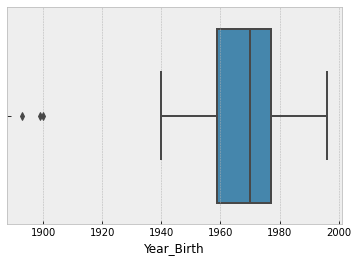

In [ ]:
boxplot(df.Year_Birth)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


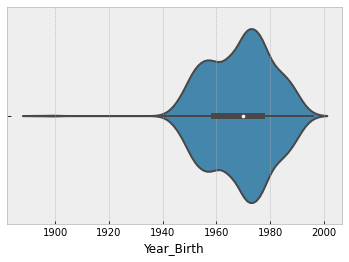

In [ ]:
violinplot(df.Year_Birth, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


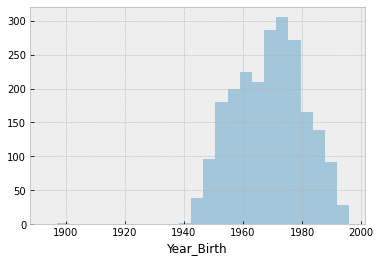

In [ ]:
sns.distplot(df.Year_Birth, kde=False, bins = 25)

**Conclusiones previas variable 'Year_Birth':** 

En los gráficos desarrollados se observa que la mayor concentración de clientes ha nacido en el rango de los años entre 1960 y 1980 apróximadamente. Asimismo, en el boxplot se puede visualizar con claridad la presencia de algunos valores atípicos que se deberán analizar a continuación.

Por otro lado, creo que sería más sencillo manejarnos con una variable 'Age', a lo cual luego procedo a crearla a partir de 'Year_Birth' y de considerar 2014 como el año de toma de la muestra. Si bien no será totalmente exacta ya que no cuento con la fecha precisa de este dataset, sino unicamente 'Año", lo realizo a los fines prácticos y didácticos del proyecto final. 

###Age & Age_Range (nueva variable)

In [ ]:
#Calculo las edades aproximadas de los clientes tomando el año 2014 como la de la fecha de la encuesta
anio_encuesta=2014
Age = anio_encuesta - df['Year_Birth']
Age

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Year_Birth, Length: 2240, dtype: int64

In [ ]:
#Incorporo la variable 'Age' a nuestro dataframe
df['Age'] = Age
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,33


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


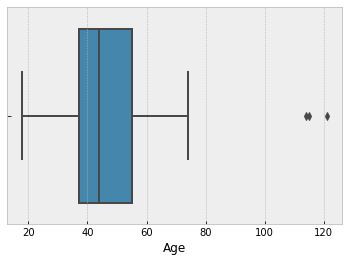

In [ ]:
boxplot(df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


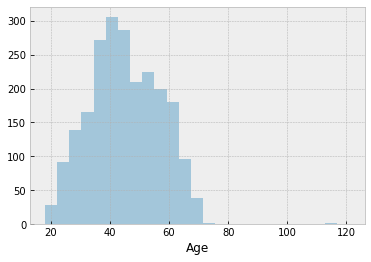

In [ ]:
sns.distplot(df.Age, kde=False, bins = 25)

In [ ]:
#Visualizo cuáles son los casos 'atípicos' mayores a 100 años 
df[(df['Age']>100)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,114
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,121
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,115


**Conclusiones previas variable 'Age':** 

Ahora sí, a partir de la variable Year_Birth obtenemos 'Age' con la que es más sencillo trabajar e interpretar rápidamente. Podemos observar que el rango etáreo que predomina es de aquellos clientes de 40 años aproximadamente, y 30-50 si nos extendemos un poco más. 

En los gráficos se ve con claridad que los casos atípicos tendrían más de 110 años, lo cual luego confirmo filtrando los datos, por lo cual infiero que se corresponden con errores puntuales en el origen de los datos únicamente de la variable Year_Birth y que debo trabajarlos puntualmente a continuación.

In [ ]:
#Obtengo la media de 'Age' tomando como base un dataframe que no incluya los valores atípicos
Age_menor_cien=df[(df['Age']<100)]
round(Age_menor_cien['Age'].mean(),0)

45.0

In [ ]:
#Reemplazo los valores Age>100 por la media de Age
df.loc[df.Age>100,'Age']=round(Age_menor_cien['Age'].mean(),0)

In [ ]:
#Compruebo que se haya efectuado correctamente los reemplazos
df.loc[[192, 239, 339]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,45
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,45
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,45


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


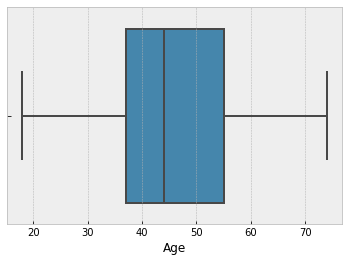

In [ ]:
#Corroboro que no se visualicen los outliers en el boxplot 
boxplot(df.Age)

Puedo definir rangos para crear una variable que sea más funcional al posterior análisis bivariado y multivariado.

In [ ]:
#Defino los rangos, sus nombres y efectúo el corte, creando una nueva variable
rangos_Age = [0, 30, 50, 70, 100 ]
id_rango_Age= ['Jóvenes','Adultos','Adult-Mayor','Mayor']
Age_Range = pd.cut(df['Age'],rangos_Age,labels=id_rango_Age)
df['Age_Range'] = Age_Range

In [ ]:
df['Age_Range']

0       Adult-Mayor
1       Adult-Mayor
2           Adultos
3           Jóvenes
4           Adultos
           ...     
2235        Adultos
2236    Adult-Mayor
2237        Adultos
2238    Adult-Mayor
2239    Adult-Mayor
Name: Age_Range, Length: 2240, dtype: category
Categories (4, object): ['Jóvenes' < 'Adultos' < 'Adult-Mayor' < 'Mayor']

In [ ]:
#Corroboro las nuevas variables
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Range
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,57,Adult-Mayor
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,60,Adult-Mayor
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,49,Adultos
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,30,Jóvenes
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,33,Adultos


###Education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Education,Cantidad
2,Graduation,1127
4,PhD,486
3,Master,370
0,2n Cycle,203
1,Basic,54


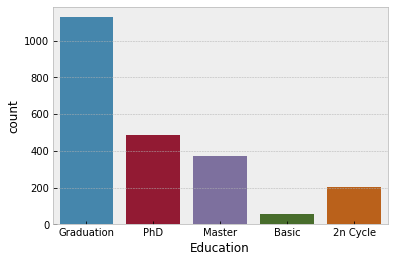

In [ ]:
#Calculo y grafico la cantidad de clientes según su nivel educativo
sns.countplot(df['Education'])
count_education=df.groupby('Education').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_education

In [ ]:
#Obtengo porcentajes
pct_education=count_education['Cantidad'].groupby(level=0).apply(lambda x:100 * x / float((count_education['Cantidad']-1).sum()))
round(pct_education,2)

2    50.43
4    21.74
3    16.55
0     9.08
1     2.42
Name: Cantidad, dtype: float64

**Conclusiones previas variable 'Education':** 

A través del gráfico y de los porcentajes calculados posteriormente, se puede observar que la mayor parte de los clientes son graduados universitarios (50.43% del total), seguido de aquellos con doctorado (21,74%) y con un master (16,55%). Por último, se encuentran aquellos que han alcanzado el nivel '2n Cycle' que podríamos asimilar a un posgrado (9,08%), y primario (2,42%). 

Se puede decir que el dataframe está compuesto por clientes con un alto grado de nivel educativo, siendo que más del 97% de ellos ha alcanzado como mínimo título universitario, y más del 47% estudios posteriores al universitario.

###Marital_Status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Marital_Status,Cantidad
3,Married,864
5,Together,580
4,Single,480
2,Divorced,232
6,Widow,77
1,Alone,3
0,Absurd,2
7,YOLO,2


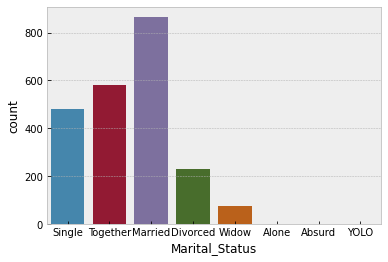

In [ ]:
#Calculo y grafico cantidad de clientes segun estado civil
sns.countplot(df['Marital_Status'])
count_marital_status=df.groupby('Marital_Status').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_marital_status

In [ ]:
#Obtengo porcentajes
pct_marital_status=count_marital_status['Cantidad'].groupby(level=0).apply(lambda x:100 * x / float((count_marital_status['Cantidad']-1).sum()))
round(pct_marital_status,2)

3    38.71
5    25.99
4    21.51
2    10.39
6     3.45
1     0.13
0     0.09
7     0.09
Name: Cantidad, dtype: float64

**Conclusiones previas variable 'Marital_Status':** 

A través del gráfico y de los porcentajes calculados posteriormente, se puede observar que la mayor parte de los clientes se encuentran casados (38,71% del total), mientras que el 25,99% conviven. Más allá de que una categoría se ha casado y otra no, en el análisis podría ir más allá diciendo que a ambos los puedo incluir en una misma categoría clientes en pareja que totalizan un 64,70% de la muestra. 

Un 21,51% se encuentra soltero/a, un 10,39% divorciado/a y un 3,45% de viduos/as. Para finalizar, existen unos casos (específicamente tres -3-) que contestaron 'Alone', a lo cual podría posteriormente asignarlos a 'Single'. Otros 2 casos contestaron como 'absurdo' y lo mismo para 'YOLO' (You only live once).




In [ ]:
#Con el objetivo de reducir la cantidad de opciones dentro de esta variable, lo cual además podría afectar nuestro modelo, 
#procederemos a reemplazar/unificar ciertos criterios
#'Alone' debería estar dentro de 'Single' ya que son similares. 
#Y por otro lado reemplazaremos 'YOLO' y' 'Absurd' también dentro de 'Single' ya que podría asimilarse.
df.Marital_Status = df.Marital_Status.replace({'Alone':'Single','YOLO':'Single','Absurd':'Single'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Marital_Status,Cantidad
1,Married,864
3,Together,580
2,Single,487
0,Divorced,232
4,Widow,77


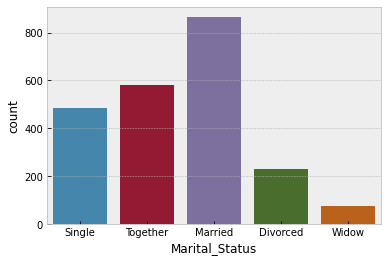

In [ ]:
#Corroboramos su correcta modificación
sns.countplot(df['Marital_Status'])
count_marital_status=df.groupby('Marital_Status').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_marital_status

###Income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


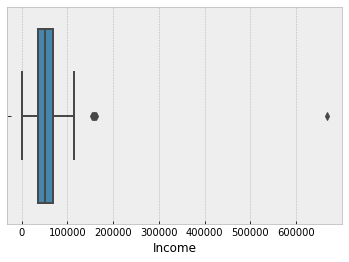

In [ ]:
boxplot(df.Income)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


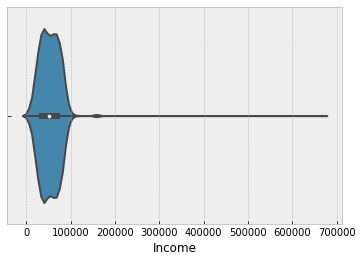

In [ ]:
violinplot(df.Income, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


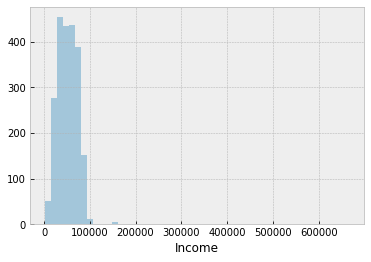

In [ ]:
sns.distplot(df.Income, kde=False, bins = 50)

In [ ]:
#Identifico el caso 'atípico' de nuestra variable
df[(df['Income']>200000)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Range
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,3,11,0,37,Adultos


**Conclusiones previas variable 'Income':** 

Los gráficos planteados se ven altamente afectados por lo que pareciera ser 1 (un) caso atípico por error de tipeo (666666), el cual debo tratar con el fin de proseguir con el análisis de esta variable.

Infiero que se corresponde con un error puntual que afecta únicamente de la variable Income, por lo cual no procedoa eliminar este caso atípico, sino a reemplazarlo por la media.

Asimismo, esta variable es la única que presentaba valores missing (24) los cuales también procedo a reemplazar por la media.

In [ ]:
#Obtengo la media de 'Income' tomando como base un dataframe que no incluya el atípico
Income_outlier=df[(df['Income']!=666666)]
round(Income_outlier['Income'].mean(),0)

51970.0

In [ ]:
#Reemplazo el valor por la media de Income (calculada sin el valor atípico)
df.loc[df.Income==666666,'Income']=round(Income_outlier['Income'].mean(),0)

In [ ]:
#Comprobamos que se haya efectuado correctamente el reemplazo
df.loc[[2233]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Range
2233,9432,1977,Graduation,Together,51970.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,3,11,0,37,Adultos


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


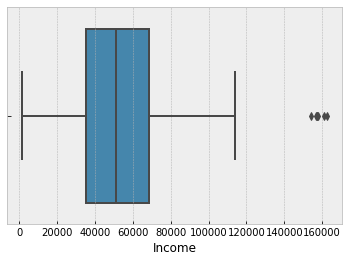

In [ ]:
#Ahora sí, corroboro los gráficos nuevamente
boxplot(df.Income)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


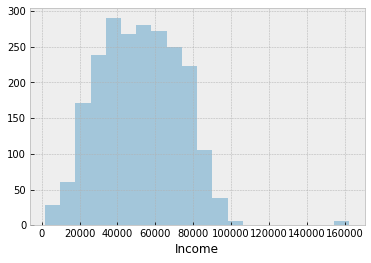

In [ ]:
sns.distplot(df.Income, kde=False, bins = 20)

In [ ]:
#Identifico los 'nuevos' atípicos
df[(df['Income']>120000)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Range
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,3,11,0,41,Adultos
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,3,11,0,38,Adultos
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,3,11,0,39,Adultos
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,3,11,0,32,Adultos
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,3,11,0,43,Adultos
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,3,11,0,37,Adultos
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,3,11,0,65,Adult-Mayor


In [ ]:
# Por último, imputo los 24 valores missing que tenía con la Media
# Aquí intenté aplicar diferentes fragmentos de código para reemplazar los missing con la media de 'Income' según cada nivel educativo y no la media en general.
# Pero fueron intentos infructuosos, y por lo cual procedí a realizarlo por la media general.
df['Income'].fillna(round(df['Income'].mean(),0), inplace=True)
print("Valores perdidos en Income: " + 
      str(df['Income'].isnull().sum()))

Valores perdidos en Income: 0


**Nuevas conclusiones variable 'Income':** 

Ahora bien, con una media aproximada en los 52.000 y sin el valor atípico de 666.666, surgen nuevos valores atípicos pero que considero lógicos y relativos a aquellos clientes de altos ingresos.

Asimismo, ya no existen valores missing en esta variable y por ende en todo el dataset.


###Kidhome 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Kidhome,Cantidad
0,0,1293
1,1,899
2,2,48


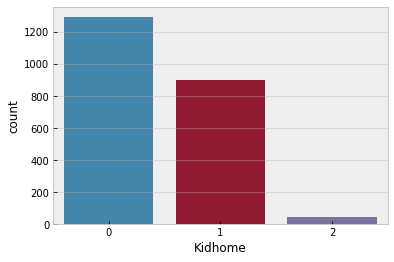

In [ ]:
#Conteo y gráfico
sns.countplot(df['Kidhome'])
count_kidhome=df.groupby('Kidhome').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_kidhome

In [ ]:
#Porcentajes
pct_kidhome=count_kidhome['Cantidad'].groupby(level=0).apply(lambda x:100 * x / float((count_kidhome['Cantidad']-1).sum()))
round(pct_kidhome,2)

0    57.80
1    40.19
2     2.15
Name: Cantidad, dtype: float64

###Teenhome 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Teenhome,Cantidad
0,0,1158
1,1,1030
2,2,52


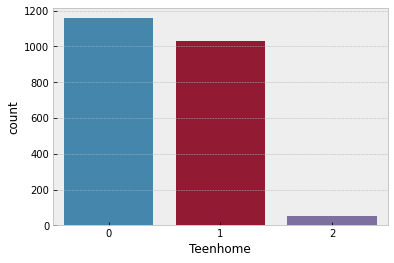

In [ ]:
#Conteo y gráfico
sns.countplot(df['Teenhome'])
count_teenhome=df.groupby('Teenhome').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_teenhome

In [ ]:
#Porcentajes
pct_teenhome=count_teenhome['Cantidad'].groupby(level=0).apply(lambda x:100 * x / float((count_teenhome['Cantidad']-1).sum()))
round(pct_teenhome,2)

0    51.77
1    46.04
2     2.32
Name: Cantidad, dtype: float64

**Conclusiones previas variable 'Kidhome' y 'Teenhome':** 

Analizando de manera separada estas variables, visualizo que en ambos casos más del 50% no cuenta con niños o adolescentes, mientras que alrededor del 40-45% posee 1 (uno), solo un 2% posee 2 (dos). 

Ya que son variables separadas, se me ocurre crear una variable que sumarice ambas ya que quizas allí cambien un poco las distribuciones entre los clientes que tienen hijos y los que no.

###Kid_and_teens (nueva variable)

In [ ]:
#Sumarizo ambas variables para crear una nueva denominada 'Kids_and_teens'
Kids_and_teens = df['Kidhome'] + df['Teenhome']
Kids_and_teens

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Length: 2240, dtype: int64

In [ ]:
#Incorporo la variable 'Kids_and_teens' al dataframe
df['Kids_and_teens'] = Kids_and_teens
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Range,Kids_and_teens
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,57,Adult-Mayor,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,60,Adult-Mayor,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,49,Adultos,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,30,Jóvenes,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,33,Adultos,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Kids_and_teens,Cantidad
1,1,1128
0,0,638
2,2,421
3,3,53


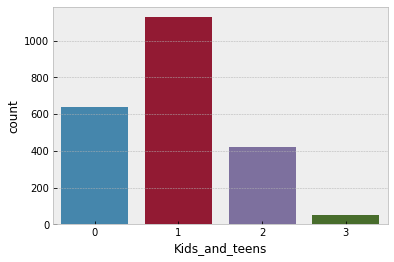

In [ ]:
#Conteo y gráfico
sns.countplot(df['Kids_and_teens'])
count_kids_and_teens=df.groupby('Kids_and_teens').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_kids_and_teens

In [ ]:
#Obtengo porcentajes
pct_count_kids_and_teens=count_kids_and_teens['Cantidad'].groupby(level=0).apply(lambda x:100 * x / float((count_teenhome['Cantidad']-1).sum()))
round(pct_count_kids_and_teens,2)

1    50.42
0    28.52
2    18.82
3     2.37
Name: Cantidad, dtype: float64

**Conclusiones previas variable 'Kids_and_teens:** 

Ahora sí, se observa como aquellos clientes que tienen 1 (un) hijo (ya sea pequeño o adolescente) representa la mayor proporción con un 50,42%, seguido de aquellos que no tienen hijos con 28,52%, y 2(dos) con 18,82%. Por último, un 2,37% cuenta con 3 hijos. 

###Dt_Customer




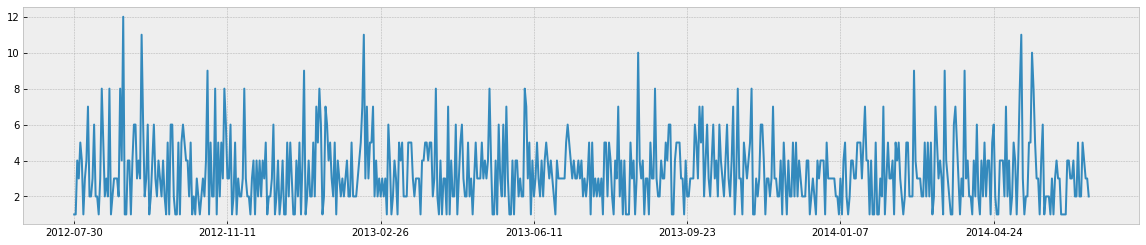

In [ ]:
#Grafico la variable datetime
df['Dt_Customer'].value_counts().sort_index().plot.line(figsize=(20, 4))

**Conclusiones previas variable 'Dt_Customer:**

Debido a que las fechas son muy dispares y engloban un amplio período, procedo a calcular la cantidad de días que tiene cada uno como clientes para luego a partir de allí realizar el análiss.


###Days_Customer & Range_Customer (nuevas variables)

In [ ]:
#Obtengo la fecha máxima, la cual es 29/06/2014, por lo cual considero 30/06/2014 como la fecha de análisis.
max_dtcustomer= df['Dt_Customer'].max() 
max_dtcustomer=pd.to_datetime(max_dtcustomer)
max_dtcustomer

Timestamp('2014-06-29 00:00:00')

In [ ]:
#Paso también la variable 'Dt_Customer' a tipo datetime para poder realizar la operación
#Creo la nueva variable 'Days_Customer' y la transformo a un número entero
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
Days_Customer = max_dtcustomer - df['Dt_Customer']
Days_Customer = Days_Customer.astype('timedelta64[D]').astype(int)

In [ ]:
#Incorporo la variable 'Days_Customer' al dataframe
df['Days_Customer'] = Days_Customer
df['Days_Customer'] 

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Days_Customer, Length: 2240, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


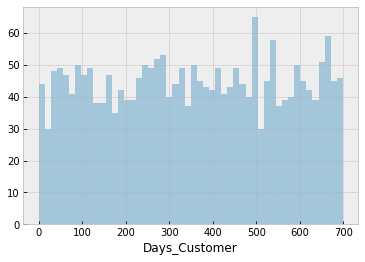

In [ ]:
#La grafico
sns.distplot(df.Days_Customer, kde=False, bins = 50)

In [ ]:
df['Days_Customer'].max() 

699

En el histograma se visualiza que la distribución es bastante uniforme, con algunos picos que sobresalen por sobre el resto. Teniendo en cuenta que el máximo de días es de 699, podría hacer un corte en 3 partes para diferenciar aquellos clientes relativamente nuevos (hasta 233 días), luego mayores a 233 y hasta 466 días, y por último aquellos mayores a 466 y hasta 699. Esta separación podría ser de utilidad en un posterior analisis bivariado y multivariado.

In [ ]:
#Defino los rangos, sus nombres y efectúo el corte, creando la variable Range_customer 
rangos_days_customer = [0, 233, 466, 700]
id_rango_days_customer= ['Nuevo','Intermedio','Antiguo']
Range_Customer = pd.cut(df['Days_Customer'],rangos_days_customer,labels=id_rango_days_customer )

In [ ]:
#Corroboro la correcta inclusión en el dataset, y compruebo que se haya efectuado el corte según lo previsto.
df['Range_Customer'] =Range_Customer

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Range_Customer,Cantidad
1,Intermedio,770
2,Antiguo,761
0,Nuevo,707


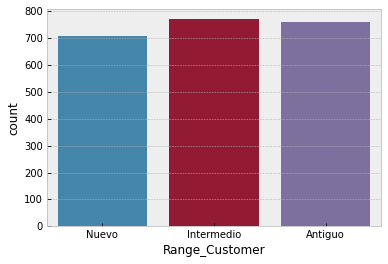

In [ ]:
#Visualizo las cantidades según los rangos creados
sns.countplot(df['Range_Customer'])
count_Range_Customer=df.groupby('Range_Customer').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_Range_Customer

**Conclusiones previas variable 'Range_Customer':** 

Con este corte realizado corroboroque los rangos manejan cantidades similares, con un leve predominio de los rangos '233 a 466' y '466 a 699' por sobre el rango más nuevo.

### Recency

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


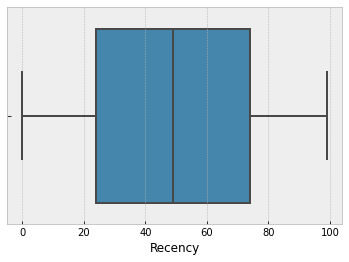

In [ ]:
boxplot(df.Recency)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


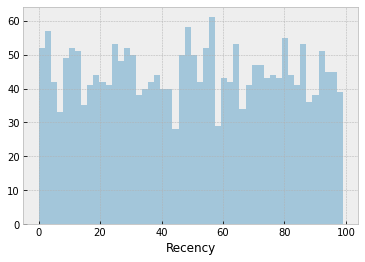

In [ ]:
sns.distplot(df.Recency, kde=False, bins = 50)

**Conclusiones previas variable 'Recency':** 

Se visualiza una distribución bastante uniforme de la cantidad de días desde la última compra, con algunos picos y altibajos. No hay presencia de valores atípicos.

###Complain

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Complain,Cantidad
0,0,2219
1,1,21


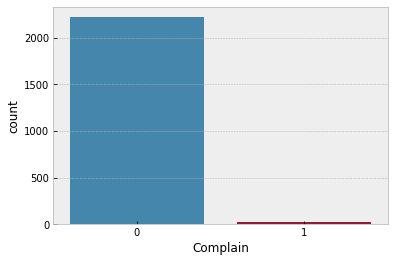

In [ ]:
#Conteo y gráfico
sns.countplot(df['Complain'])
count_Complain=df.groupby('Complain').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_Complain

In [ ]:
#Obtengo porcentajes
pct_Complain=count_Complain['Cantidad'].groupby(level=0).apply(lambda x:100 * x / float((count_Complain['Cantidad']-1).sum()))
round(pct_Complain,2)

0    99.15
1     0.94
Name: Cantidad, dtype: float64

**Conclusiones previas variable 'Complain':**

Se visualiza que la proporción de clientes que se ha quejado en los últimos dos años es mínima, apenas rozando el 1%.




###Z_CostContact y Z_Revenue

Estas dos variables se encuentran en el dataset pero no cuentan con la explicación de su significado desde la fuente de origen (kaggle).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Z_CostContact,Cantidad
0,3,2240


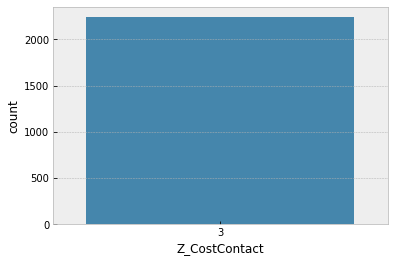

In [ ]:
sns.countplot(df['Z_CostContact'])
count_Z_CostContact=df.groupby('Z_CostContact').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_Z_CostContact

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Z_Revenue,Cantidad
0,11,2240


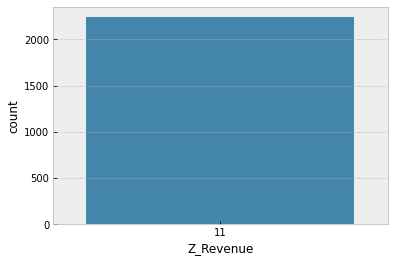

In [ ]:
sns.countplot(df['Z_Revenue'])
count_Z_Revenue=df.groupby('Z_Revenue').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
count_Z_Revenue

**Conclusiones previas variable 'Z_CostContact y Z_Revenue':**

Si bien no cuento con la explicación de la variable, se visualiza que en ambos casos el valor es el mismo para todos los registros del dataset. Por lo cual serán variables que no tomaré en el modelo predictivo.

### Total_AcceptedCmp (nueva variable)

In [ ]:
#Sumarizo ambas variables para crear una nueva denominada 'Total_AcceptedCmp', la cual reflejaría la cantidad total de campañas previas que aceptó el cliente
Total_AcceptedCmp = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] 
Total_AcceptedCmp

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Length: 2240, dtype: int64

In [ ]:
df['Total_AcceptedCmp'] = Total_AcceptedCmp

Creo esta nueva variable que totaliza la cantidad de campañas de marketing que han aceptado, con el objetivo que ayude a nuestro análisis y potencial modelo.

###Total_Amount_Spent (nueva variable)

In [ ]:
#Ahora sumarizo las diferentes variables de monto abonado por rubro para crear una nueva denominada 'Total_Amount_Spent'
Total_Amount_Spent = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntWines'] + df['MntGoldProds'] 
Total_Amount_Spent

0       1529
1         26
2        755
3         50
4        395
        ... 
2235    1223
2236     444
2237    1229
2238     813
2239     171
Length: 2240, dtype: int64

In [ ]:
df['Total_Amount_Spent'] = Total_Amount_Spent

Creo esta nueva variable que totaliza la cantidad de dinero gastando en los diversos rubros bajo análisis, con el objetivo que ayude a nuestro modelo.

##Análisis Bivariado

In [ ]:
import pandas_profiling # Importo e instalo el data profiling

In [ ]:
#pip install -U pandas-profiling

In [ ]:
#Realicé el profiling del dataset para tener un análisis completo y acabado de las variables
#Oculto los resultados con el objetivo de disminuir el tamaño del archivo a presentar y debido a que se procede a realizar el análisis aplicando los gráficos y metologías vistas en el curso
#profile = pandas_profiling.ProfileReport(df)
#profile

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


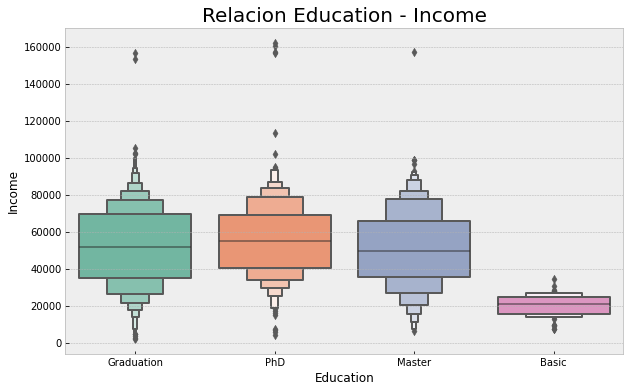

In [ ]:
# Relacion entre Education/Income
# Previo a realizarlo, reemplazo la categoría '2n Cycle' por 'master', unificando así dos categorías de estudio similares entre sí. 
# El doctorado por otro lado sería un grado superior, con mayor cantidad de años y una orientación más científica
df.Education = df.Education.replace({'2n Cycle':'Master'})
fig_dims = (10, 6)
plt.subplots(figsize=fig_dims)
sns.boxenplot(df['Education'], df['Income'], palette = 'Set2')
plt.title('Relacion Education - Income', fontsize = 20, fontweight = 30)
plt.show()

De este análisis se puede observar claramente como el nivel educativo alcanzado tiene una alta incidencia en los ingresos informados por los clientes. Aquellos que solo cuentan con estudios básicos (colegio secundario) perciben ingresos ínfimos al compararlos con el resto. Asimismo, también se puede observar como las 3 categorías que universitarias presentan valores 'atipicos' por encima de los 100.000, pero la categoría 'básica' no.

A su vez, dentro de Graduation - Master - PhD, se visualiza que estos últimos son los que presentan la media de los sueldos y los valores 'atípicos' más altos.

Text(0.5, 1.0, 'Relacion entre Total_Amount_Spent y Income')

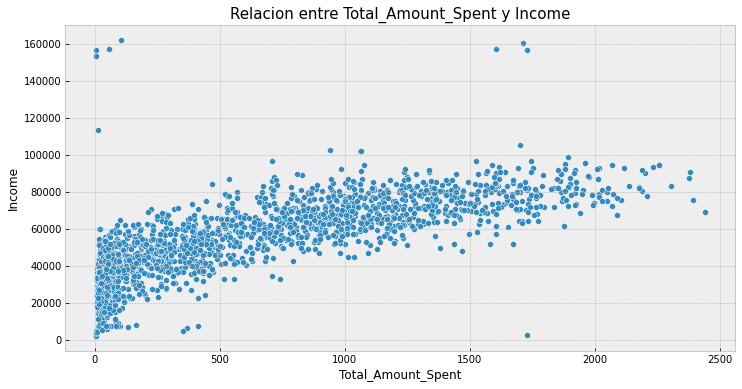

In [ ]:
# Relacion entre Total_Amount_Spent & Income
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Total_Amount_Spent", y="Income", data=df)
plt.title('Relacion entre Total_Amount_Spent y Income', fontsize = 15, fontweight = 20)

Se observa una relación positiva entre las variables Income y Total_Amount_Spent, con casos aislados que escapan a esta lógica obviamente, pero respetando una tendencia que a mayor ingreso, mayor es lo gastado en los diversos rubros.

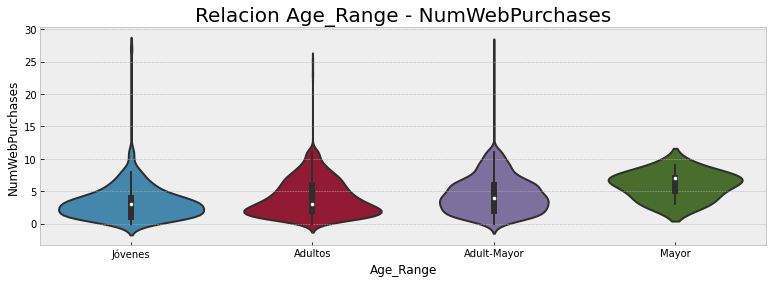

In [ ]:
# Relacion entre Age & NumWebPurchases
plt.figure(figsize=(13, 4))
plt.title('Relacion Age_Range - NumWebPurchases', fontsize = 20, fontweight = 30)
sns.violinplot(data=df, x = "Age_Range", y = "NumWebPurchases",kind='hist')

Se observa lógicamente una mayor base de compradores online en las 3 (tres) franjas etáreas más 'jóvenes' (hasta 70 años).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


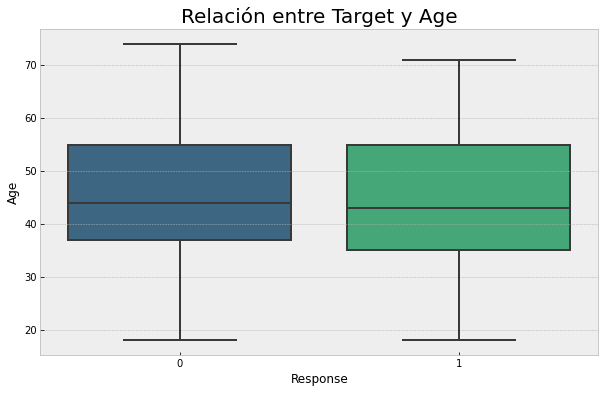

In [ ]:
# Relacion entre nuestra variable target 'Response' y 'Age'
plt.rcParams['figure.figsize'] = (10, 6)
sns.boxplot(df['Response'], df['Age'], palette = 'viridis')
plt.title('Relación entre Target y Age', fontsize = 20)
plt.show()

Se observa un comportamiento bastante similar, donde lo único que podemos destacar es que en cuanto aquellos clientes que aceptaron la última campaña de marketing (Response=1), la mediana y el límite superior de la edad son levemente inferiores.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


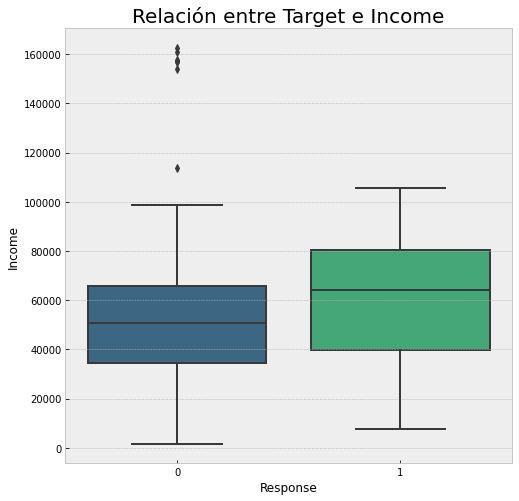

In [ ]:
# Relacion entre nuestra variable target 'Response' e 'Income'
plt.rcParams['figure.figsize'] = (8, 8)
sns.boxplot(df['Response'], df['Income'], palette = 'viridis')
plt.title('Relación entre Target e Income', fontsize = 20)
plt.show()

Aquí se visualiza como aquellos clientes que aceptaron la última campaña de marketing (Response=1) presentan un rango intercuartilico (RIC) con ingresos superiores. Asimismo, todos aquellos valores atípicos de Income con ingresos superiores a los 100.000, ninguno ha aceptado la última campaña. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


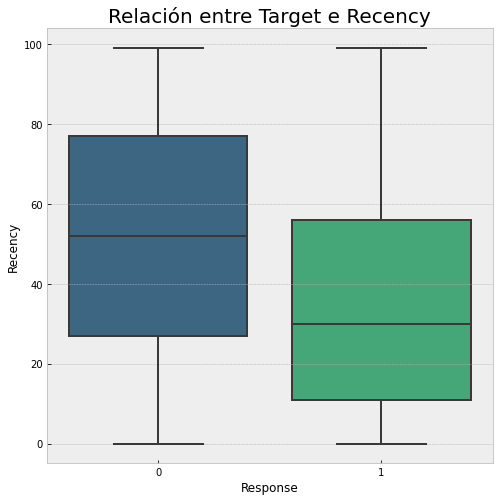

In [ ]:
# Relacion entre nuestra variable target 'Response' e 'Recency'
plt.rcParams['figure.figsize'] = (8, 8)
sns.boxplot(df['Response'], df['Recency'], palette = 'viridis')
plt.title('Relación entre Target e Recency', fontsize = 20)
plt.show()

Aquí se observa como el rango intercuartilico se encuentra marcadamente por debajo en aquellos con Response=1. Esto quiere decir que entre los clientes que aceptaron la última campaña de marketing, tienen mayor presencia los que habían comprado hace menos cantidad de días, los habitué. 

Text(0.5, 1.0, 'Relación entre Target e Education')

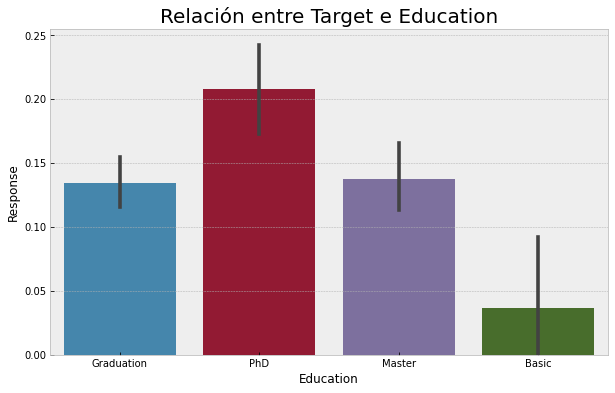

In [ ]:
#Relación entre nuestra variable target y 'Education'
fig_dims = (10, 6)
plt.subplots(figsize=fig_dims)
sns.barplot(y='Response', x='Education', data=df)
plt.title('Relación entre Target e Education', fontsize = 20)

Con este gráfico se observa como dentro de nuestra muestra, aquellos clientes con un doctorado (PhD) fueron sustancialmente el nivel de estudios alcanzado que mayor aceptación tuvo en la última campaña de marketing. Seguidamente se encuentran los que poseen un master/posgrado, y luego aquellos graduados universitarios. 

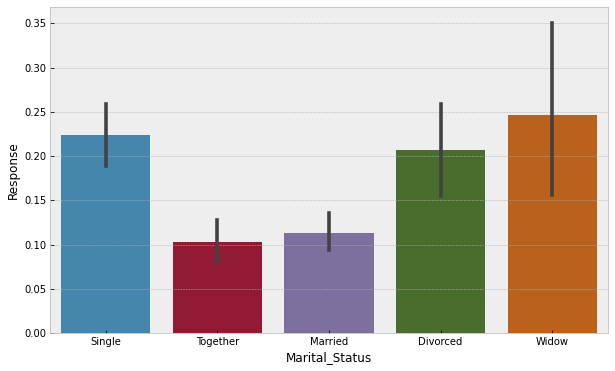

In [ ]:
#Relación entre nuestra variable target y 'Marital Status'
fig_dims = (10, 6)
plt.subplots(figsize=fig_dims)
sns.barplot(y='Response', x='Marital_Status', data=df)

Se visualiza que las categorías solteros/as, divorciados/as y viudos/as han tenido una alta aceptación en la última campañana, lo cual es un buen punto a marcar ya que son todas categorías de personas solas. Contrariamente, aquellos casados o meramente en pareja/juntados, son los que menos han aceptado.

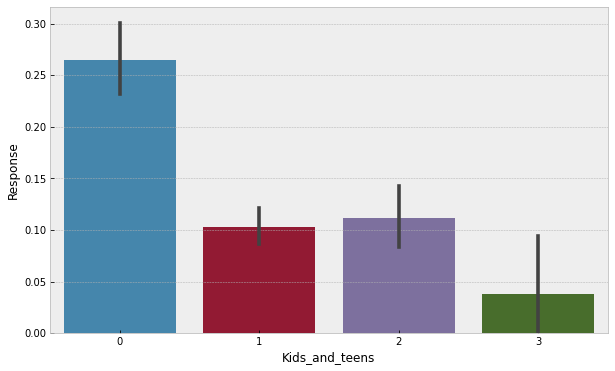

In [ ]:
#Relación entre nuestra variable target y 'Kids_and_teens'
fig_dims = (10, 6)
plt.subplots(figsize=fig_dims)
sns.barplot(y='Response', x='Kids_and_teens', data=df)

Se observa una sustancial mayor proporción de aceptación en aquellos clientes que no poseen hijos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


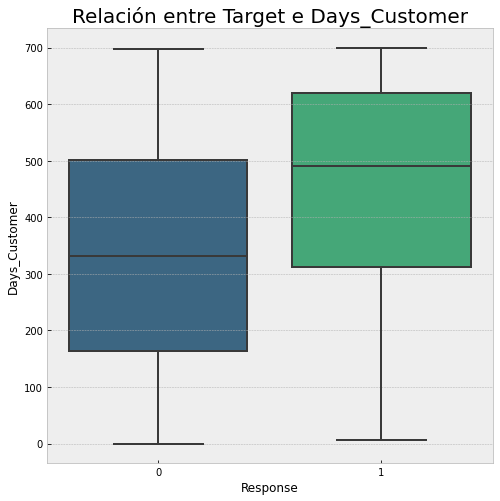

In [ ]:
# Relacion entre nuestra variable target 'Response' e 'Days_Customer'
plt.rcParams['figure.figsize'] = (8, 8)
sns.boxplot(df['Response'], df['Days_Customer'], palette = 'viridis')
plt.title('Relación entre Target e Days_Customer', fontsize = 20)
plt.show()

Se visualiza un intercuartilico marcadamente superior para aquellos que aceptaron la última campaña de marketing, lo cual significa que aquellos clientes que tienen más antigüedad fueron más propensos a response=1.

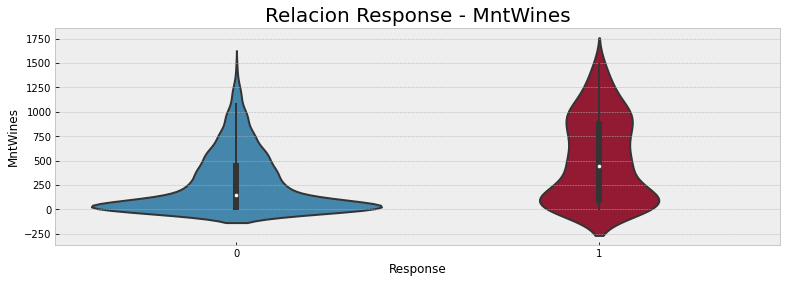

In [ ]:
# Relacion entre Response & MntWines
plt.figure(figsize=(13, 4))
plt.title('Relacion Response - MntWines', fontsize = 20, fontweight = 30)
sns.violinplot(data=df, x = "Response", y = "MntWines",kind='hist')

Tomando como ejemplo una de las variables con montos de compras según rubro, se observa una mayor tendencia de aceptación de la campaña de marketing en aquellos clientes con altos importes de compra en 'Vinos'.

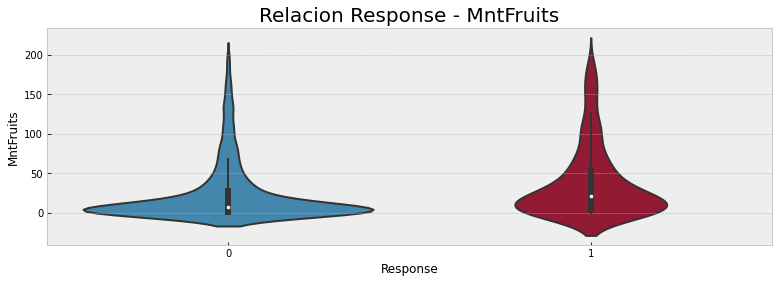

In [ ]:
# Relacion entre Response & MntFruits
plt.figure(figsize=(13, 4))
plt.title('Relacion Response - MntFruits', fontsize = 20, fontweight = 30)
sns.violinplot(data=df, x = "Response", y = "MntFruits",kind='hist')

En este caso si tomo el rubro 'Fruta' se observan comportamientos similares, únicamente que en el caso de los que no han aceptado (Response=0) cuenta con una base de clientes que tampoco han comprado fruta mucho mayor a los que sí. 

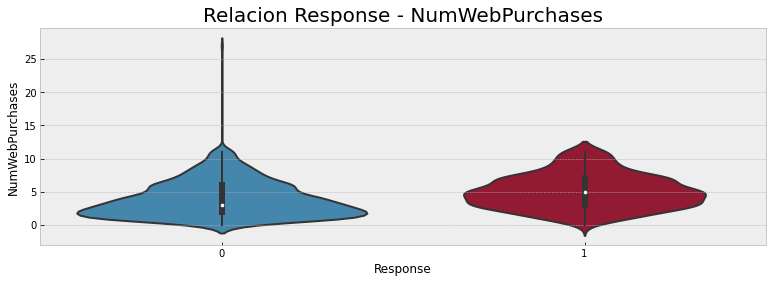

In [ ]:
# Relacion entre Response & NumWebPurchases
plt.figure(figsize=(13, 4))
plt.title('Relacion Response - NumWebPurchases', fontsize = 20, fontweight = 30)
sns.violinplot(data=df, x = "Response", y = "NumWebPurchases",kind='hist')

No se observa que el número de compras mediante la web sea un factor determinante en la aceptación de la campaña de marketing. Pero si se visualiza que todos los casos con un gran número de compras vía web (mayor a 15) no han aceptado.

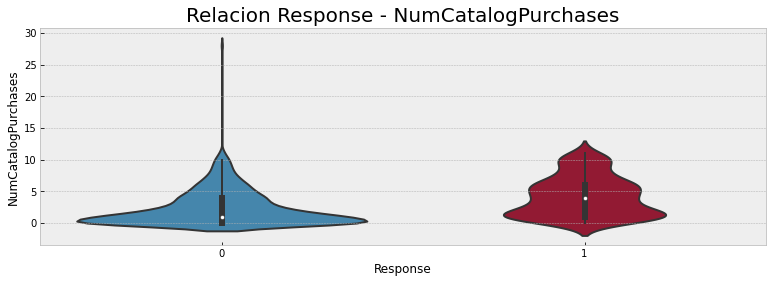

In [ ]:
# Relacion entre Response & NumCatalogPurchases
plt.figure(figsize=(13, 4))
plt.title('Relacion Response - NumCatalogPurchases', fontsize = 20, fontweight = 30)
sns.violinplot(data=df, x = "Response", y = "NumCatalogPurchases",kind='hist')

Se observa una mayor tendencia de aceptación de la campaña de marketing en aquellos clientes con superiores cantidades de compras por catálogo más allá de algunos casos puntuales. 

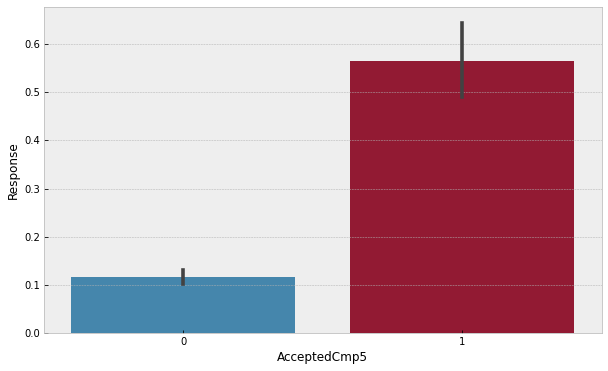

In [ ]:
#Relación entre nuestra variable target y 'AcceptedCmp5'
fig_dims = (10, 6)
plt.subplots(figsize=fig_dims)
sns.barplot(y='Response', x='AcceptedCmp5', data=df)

Tomando como ejemplo una de las variables de aceptación de la campaña, en este caso la 5ta (anteúltima), se visualiza como mayormente en aquellos casos que la aceptaron, ahora también lo hicieron en la última. 

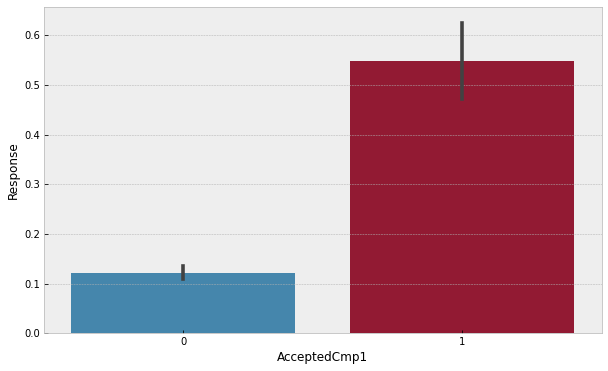

In [ ]:
#Relación entre nuestra variable target y 'AcceptedCmp1'
fig_dims = (10, 6)
plt.subplots(figsize=fig_dims)
sns.barplot(y='Response', x='AcceptedCmp1', data=df)

Lo mismo si tomamos la 1er campaña!

##Análisis Multivariado

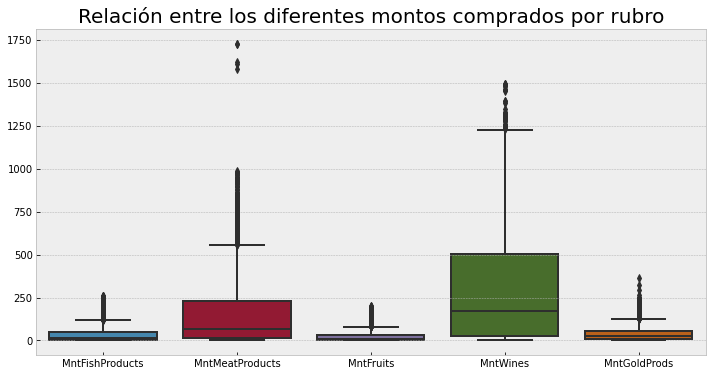

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Relación entre los diferentes montos comprados por rubro', fontsize = 20)
sns.boxplot(data = df[["MntFishProducts",	"MntMeatProducts",	"MntFruits",	"MntWines",	"MntGoldProds"]])

En el gráfico observo con claridad los hábitos de compra de los clientes incluidos en la muestra. Se destaca la compra de vinos ampliamente sobre el resto, seguido de los productos relativos a carnes rojas. A continuación se encuentran los restantes 3 rubros que parecieran comportarse con similitud, aunque este gráfico está altamente influenciado por los dos primeros rubros, siendo dificil comparar el resto. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


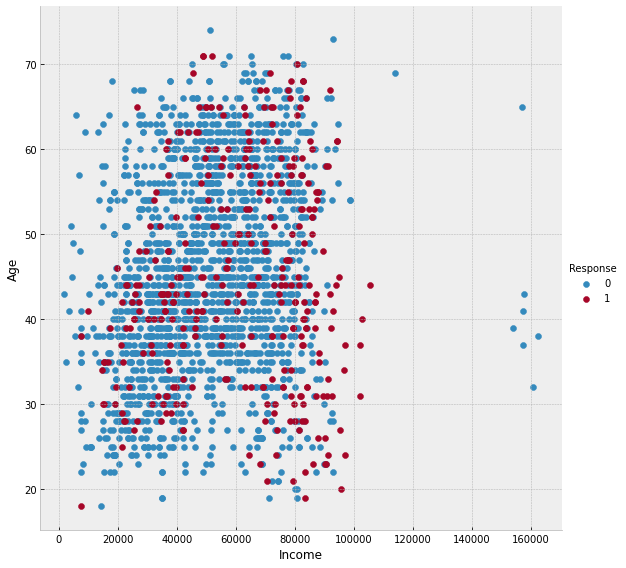

In [ ]:
#FacetGrid utilizando las variables Income/Age con nuestra variable target como 'Hue'
sns.FacetGrid(df,hue='Response',size=8).map(plt.scatter,'Income','Age').add_legend();
plt.show()

Se visualiza el comportamiento de la variable target según Edad e Ingreso, la cual no sigue ningún patrón en particular que podamos dilucidar a simple vista. Lo que si puedo decir es que aquellos 'valores atípicos' de Income, con ingresos superiores a los 110.000 aprox, ninguno ha aceptado en la última campaña de marketing.

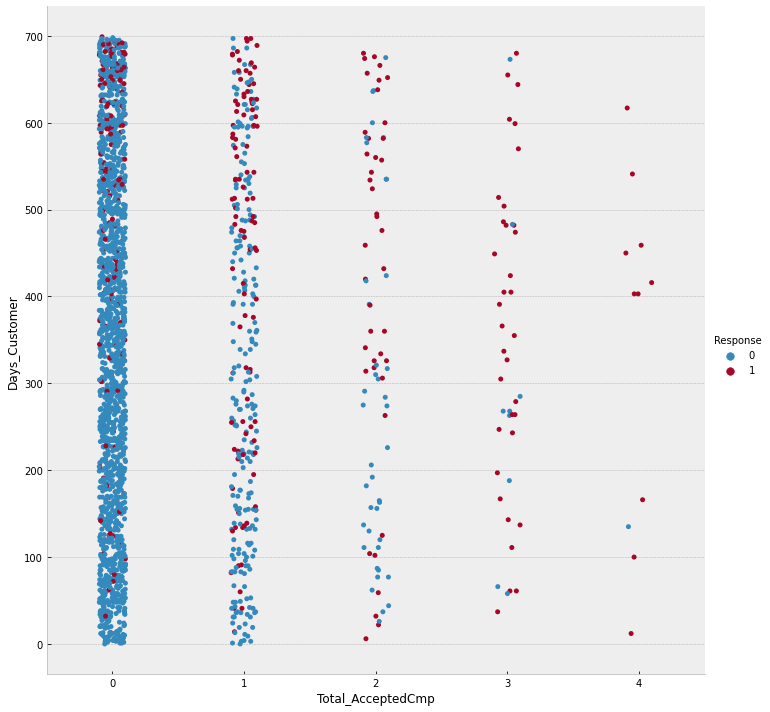

In [ ]:
#Visualizo la relación entre la cantidad de campañas aceptadas, la antiguedad de los clientes y nuestro target
sns.catplot(x="Total_AcceptedCmp", y="Days_Customer", hue="Response", data=df, height=10)

Analizando las variables 'Response', 'Total_AcceptedCmp' y 'Days_Customer', se ve claramente como prácticamente aquellos clientes que han aceptado casi todas las campañas previas (Total_AcceptedCmp= 4), también aceptaron la última, quedando solo un caso por fuera. 

Luego se ven situaciones similares con Total_AcceptedCmp = 3 y 2 aunque en menor medida. Finalmente aquellos que solo aceptaron 1 campaña previamente o ninguna, se visualiza una mayor concentración de puntos rojos (Response=1) en aquellos clientes de mayor antgüedad.

Como conclusión se visualiza como los clientes que han aceptado mayor cantidad de campañas previas son mas propensos a seguir haciéndolo, y también una leve inclinación por aceptar (aunque no suelan hacerlo) en aquellos clientes con mayor antiguedad. 

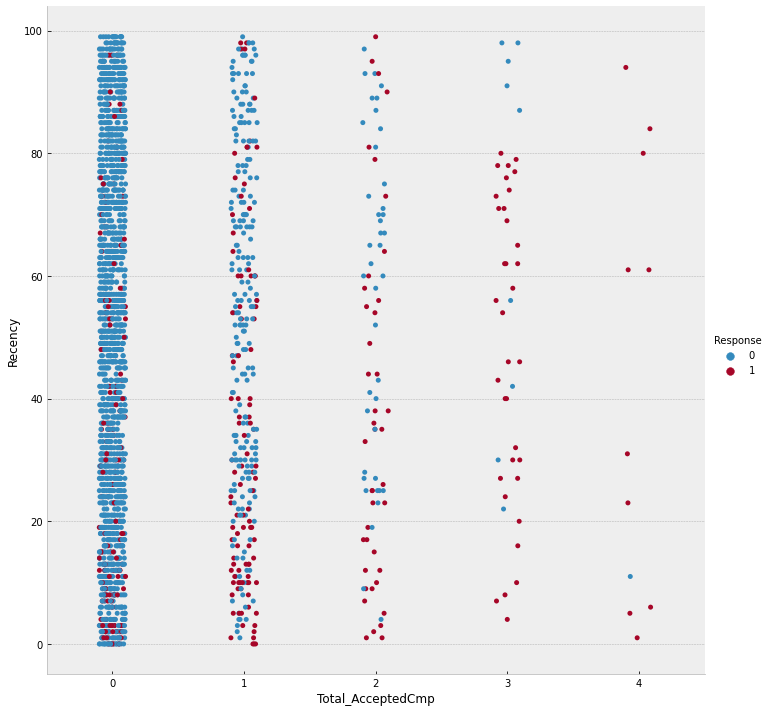

In [ ]:
#Visualizo la relación entre la cantidad de campañas aceptadas, la última compra y nuestro target
sns.catplot(x="Total_AcceptedCmp", y="Recency", hue="Response", data=df, height=10)

Similar a lo analizado previamente pero ahora tomando en cuenta la variable Recency (cantidad de días desde la última compra), surgen conclusiones similares, pero ahora se le agrega que en aquellos que solo habían aceptado 1 o ninguna, existe una mayor propensión a aceptar la última campaña en los clientes que cuentan con menos días desde la última compra.

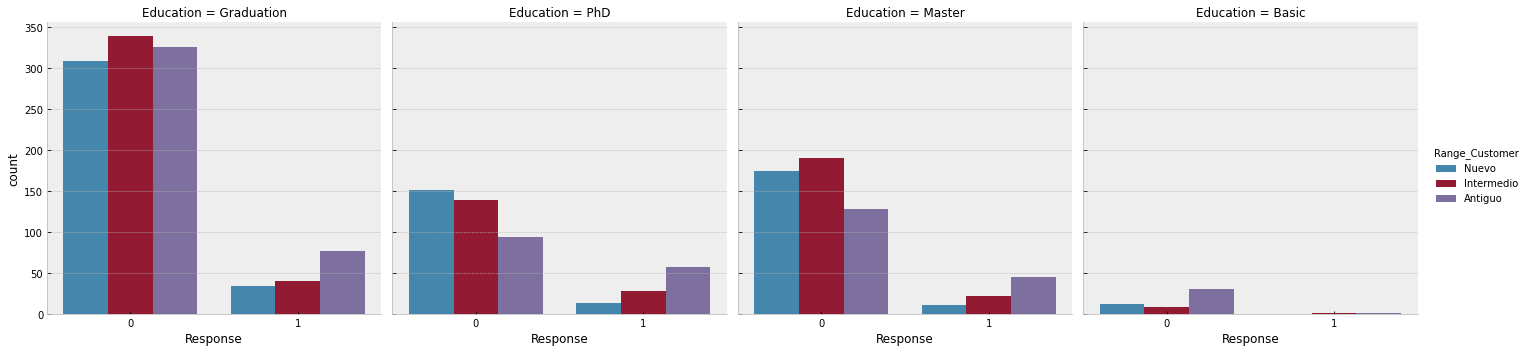

In [ ]:
#Visualizo la relación entre la antigüedad de los clientes, su nivel educativo y nuestro target
sns.catplot(x='Response', hue='Range_Customer', col='Education', data=df, kind='count')

Entre los clientes que han aceptado la última campaña (Response=1), se observa notoriamente como los clientes más propensos son aquellos de mayor antiguedad, al igual que lo observado en el análisis bivariado. Este análisis incorpora la subdivisión por nivel educativo, lo cual no aporta mayores conclusiones, ya que en todos se comporta de igual manera, excepto en el segmento 'Basic' donde prácticamente no se observan Response=1.

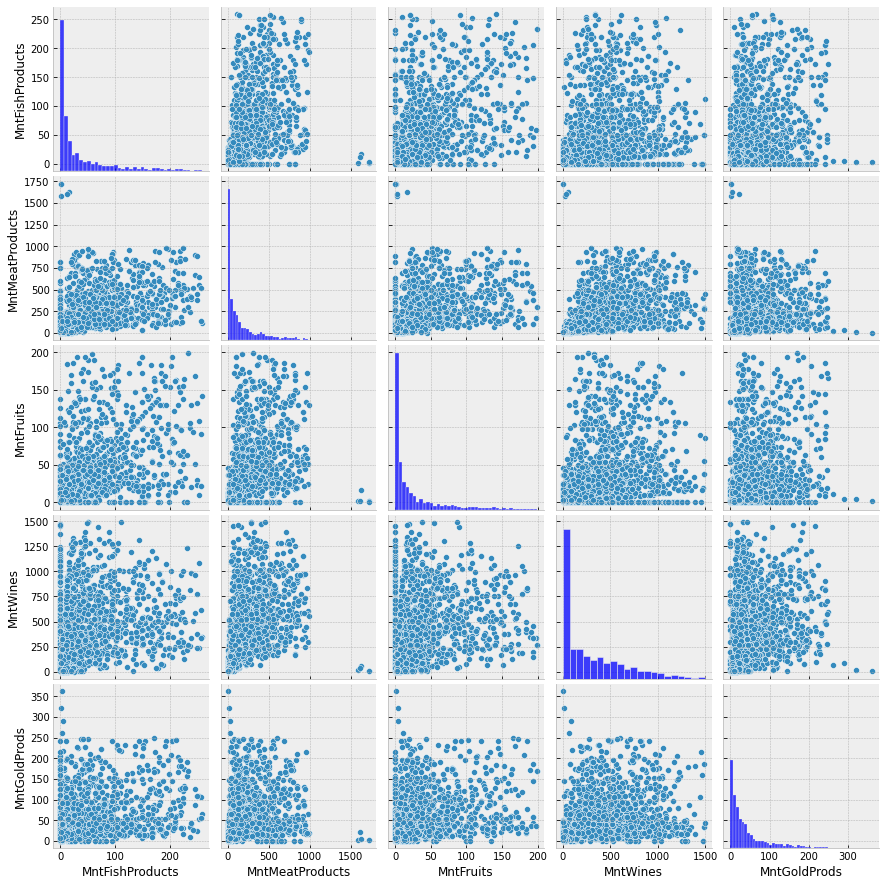

In [ ]:
#Observo las diversas correlaciones entre los distintos rubros de compra
sns.pairplot(df[["MntFishProducts",	"MntMeatProducts",	"MntFruits",	"MntWines",	"MntGoldProds"]])

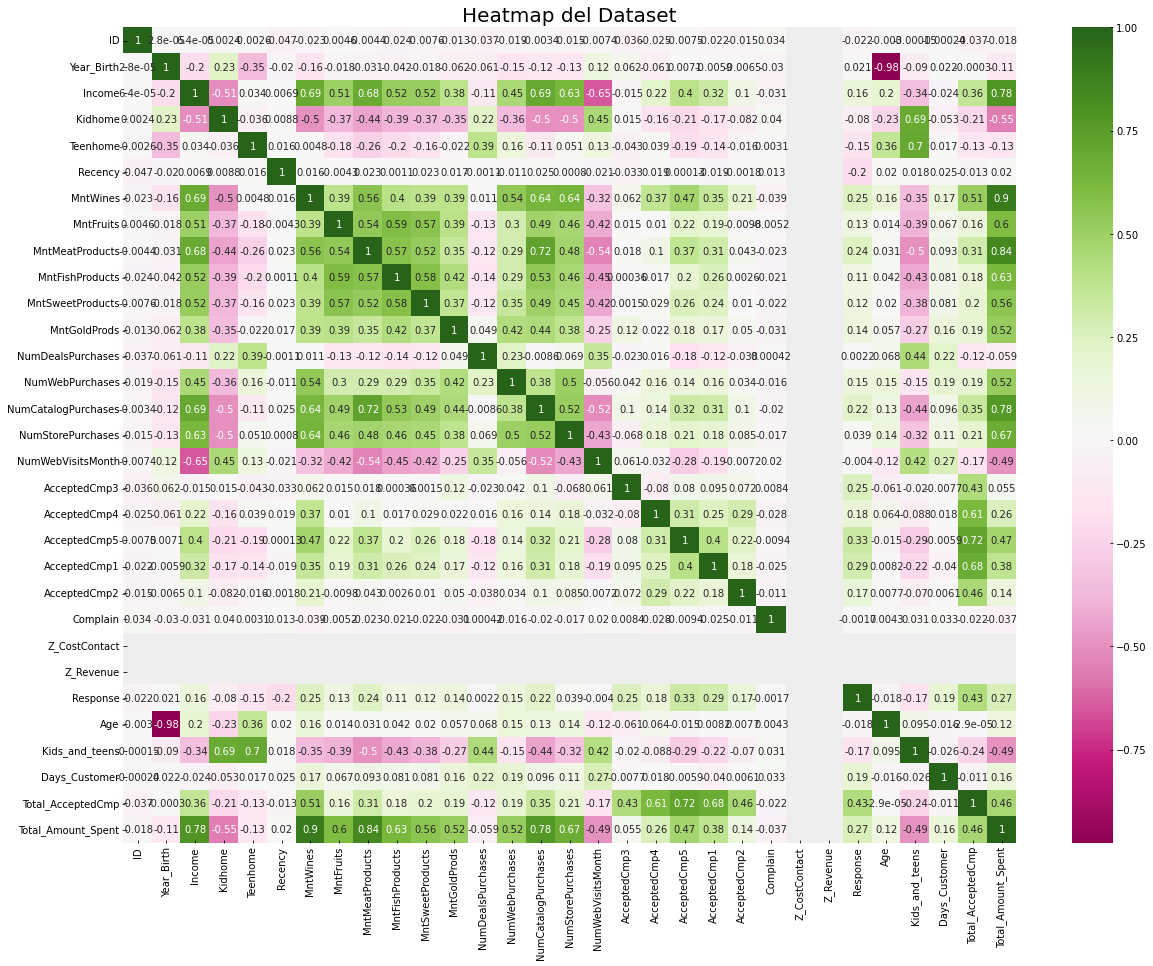

In [ ]:
#Visualizo el mapa de calor del datset observando los índices de correlación entre todas las variables
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(), annot = True, cmap = 'PiYG')
plt.title('Heatmap del Dataset', fontsize = 20)
plt.show()

Observo las distintas correlaciones de las variables, haciendo énfasis en la variable target 'Response, el cual cuenta con un alto índice respecto a la nueva variable 'Total_acceptedCmp', seguido de las restantes variables individuales de aceptación por compaña, donde es destacan 'AcceptedCmp5' y 'AcceptedCmp1'.

Asimismo, se visualiza una importante correlación con la variable 'NumCatalogPurchases', 'Days_Customer' y los montos de compra de carne y vinos (MntMeatProducts - MntWines), como así también con la nueva variable creada 'Total_Amout_Spent'. También existe una relación para tener en cuenta en nuestro modelo respecto a la variable 'Income' y 'NumWebPurchases'.

A continuación, realizaré las últimas transformaciones del dataset con el objetivo de dejarlo más limpio para la aplicación de los modelos, incluyendo las variables categóricas que hasta aquí no había pasado a numéricas.

##**Últimas transformaciones del dataframe**

In [ ]:
#Realizo una copia del dataframe con el objetivo de afrontar las últimas transformaciones y eliminar ciertas columnas sin afectar todo lo realizado previamente
df_final = df.copy()

In [ ]:
#Procedo a transformar las varibles 'Education', 'Marital_Status', 'Range_Customer', y 'Age_Range' a numéricas 
df_education = pd.get_dummies(df_final['Education'])
df_marital_status = pd.get_dummies(df_final['Marital_Status'])
df_range_customer = pd.get_dummies(df_final['Range_Customer'])
df_age_range = pd.get_dummies(df_final['Age_Range'])

In [ ]:
#Creo un frame solo con la variable target con el objetivo de joinearlo con las nuevas variables y ver su comportamiento con mayor rapidez
#Evitando así un heatmap de grandes dimensiones
df_dummies = df['Response'].copy().to_frame()

In [ ]:
#Los joineo y corroboro
df_dummies= df_dummies.join(df_education)
df_dummies= df_dummies.join(df_marital_status)
df_dummies= df_dummies.join(df_range_customer)
df_dummies= df_dummies.join(df_age_range)
df_dummies

,Response,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,Nuevo,Intermedio,Antiguo,Jóvenes,Adultos,Adult-Mayor,Mayor
0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2236,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2237,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2238,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


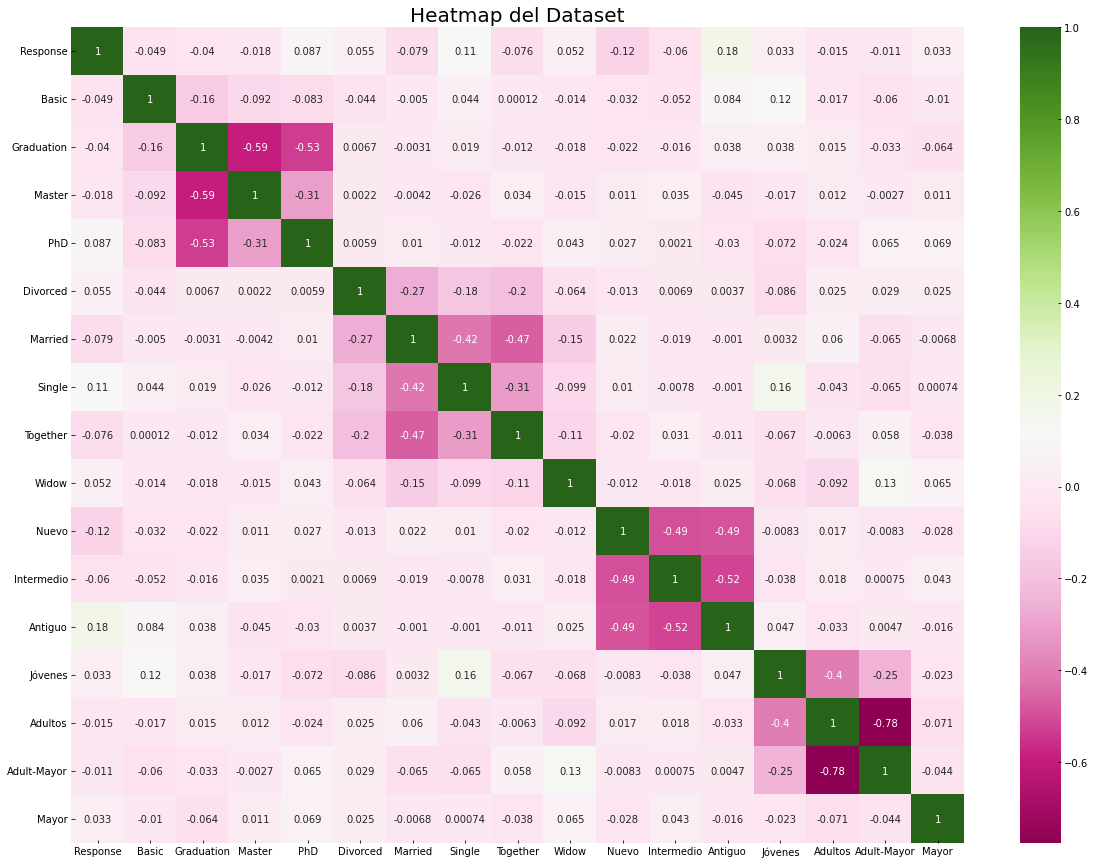

In [ ]:
#Visualizo el mapa de calor del datset comprobando los índices de correlación entre todas las variables
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df_dummies.corr(), annot = True, cmap = 'PiYG')
plt.title('Heatmap del Dataset', fontsize = 20)
plt.show()

En este heatmat se visualiza como la variable 'Antiguo' (0.18) es aquella con mas correlación para nuestra variable target 'Response'. No obstante ello, la variable 'Days_Customer' desarrollada en el heatmap anterior contaba con 0.19, por lo cual respecto a esta cuestión de antiguedad del cliente considero que es mejor incluir únicamente la variable 'Days_Customer'.

Respecto a las 4 (cuatro) variables extraidas de 'Age_Range' no aporta mucho más que la propia variable 'Age' vista en el heatmap previo.

Por último, de las variables obtenidas a partir de 'Marital_Status' y 'Education', las únicas que evidencian una mayor correlación fueron 'Single' respecto al estado civil, y 'PhD' para el nivel educativo. Probaré, en principio, únicamente sumando al frame final las 'dummies' salidas de 'Marital_Status' y 'Education'.

In [ ]:
#Incorporo estos dos frames al dataset final
df_final= df_final.join(df_education)
df_final= df_final.join(df_marital_status)

In [ ]:
#Asimismo, elimino las varaibles que ya que no son de utilidad para el modelo de predicción
df_final.drop(['ID', 'Year_Birth', 'Dt_Customer','Z_CostContact','Z_Revenue','Education','Marital_Status','Range_Customer','Age_Range','Total_Amount_Spent'], axis=1, inplace=True)
df_final.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_AcceptedCmp,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,0,1,0,0,0


# **Aplicación de los modelos de clasificación**

In [ ]:
#Importolos modelos y métricas a utilizar
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
#Importo lo necesario para la normalización del dataset
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

In [ ]:
#Previo a normalizar, obtengo los nombres de las columnas para luego de normalizar poder reemplazarlos
columns=df_final.columns

In [ ]:
#Normalizo
scaler = MinMaxScaler() 
df_final = scaler.fit_transform(df_final)
df_final = DataFrame(df_final, columns=columns)
df_final.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_AcceptedCmp,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,0.351086,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277680,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.434956,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.155079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.352051,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Separo en X e Y, eliminando de 'X' la variable a predecir, dejándola solo en 'Y' 
x = df_final.drop(df_final.iloc[:,[21]], axis=1)
y = df_final.iloc[:,[21]] 

In [ ]:
#Chequeo x e y
x.head(1)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_AcceptedCmp,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,0.351086,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y.head(1)

,Response
0,1.0


In [ ]:
# Hago el split y me quedo con 30% para test y un 70% para train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 

##Árbol de decisión

In [ ]:
#Creo el modelo y lo entreno. Utilizo max_depth=3 ya que obtiene mejores métrias que max_depth=2.
tree = DecisionTreeClassifier(max_depth=3, random_state = 42) 
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
#Predicciones
y_train_pred_tree = tree.predict(x_train) #Prediccion en Train
y_test_pred_tree = tree.predict(x_test) #Prediccion en Test

In [ ]:
#Calculo el accuracy en Train
train_accuracy_tree = round(accuracy_score(y_train, y_train_pred_tree)*100,2)

#Ahora en Test
test_accuracy_tree = round(accuracy_score(y_test, y_test_pred_tree)*100,2)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_tree,'%')
print('% de aciertos sobre el set de evaluación:',test_accuracy_tree,'%')

% de aciertos sobre el set de entrenamiento: 88.78 %
% de aciertos sobre el set de evaluación: 86.76 %


[[564  13]
 [ 76  19]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


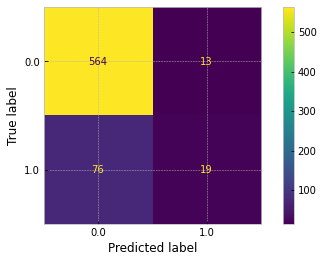

In [ ]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_test_pred_tree))

#Ploteo la Matriz
plt.rcParams['figure.figsize'] = (8, 4)
plot_confusion_matrix(tree , x_test, y_test)
plt.show()

In [ ]:
# Ahora calculo la precision
from sklearn.metrics import precision_score
print(f" La precisión es de : {round(precision_score(y_test, y_test_pred_tree)*100,2)}%")

 La precisión es de : 59.38%


In [ ]:
# Recall
from sklearn.metrics import recall_score
print(f"La recall es de: {round(recall_score(y_test, y_test_pred_tree)*100,2)}%")

La recall es de: 20.0%


In [ ]:
from sklearn.metrics import f1_score
# Calculo el F1 score
print(f"El puntaje F1 Score es de: {round(f1_score(y_test, y_test_pred_tree)*100,2)}%")

El puntaje F1 Score es de: 29.92%


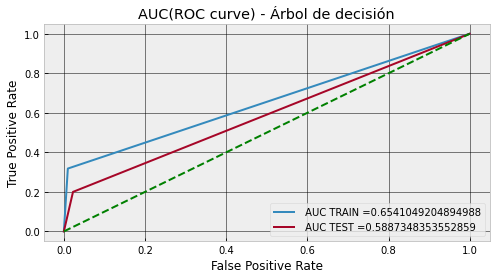

In [ ]:
#Calculo la CURVA - ROC
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_tree)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_tree)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) - Árbol de decisión")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**Conclusión Árbol de decisión:** 

En el set de entrenamiento se obtuvo un accuracy de 88.78%, mientra que en el de evaluación fue de 86.76, por lo cual se puede ver que el modelo está sobreajustando un poco. Hasta aquí parcieran ser buenas performances pero luego observando las restantes métricas podríamos llegar a diferentes conclusiones.

La precisión, que es la proporción de identificaciones positivas que fue realmente correcta (TP/(TP+FP)) fue únicamente del 59.38%. Asimismo, la proporción de positivos reales se que identificaron correctamente (TP/(TP+FN)) fue del 20.00%. Además, el score F1 (2TP/(2TP+FP*FN)) que me brinda una medida de precisión y robustez de nuesrto modelo, arrojó un 29,92%. Por último, la AUC es de 0.59.

Prosego con los siguientes modelos, pero hasta el momento las métricas no arrojan buenos resultados.

##Random Forest

In [ ]:
#Ahora procedo a la creación de un modelo de random forest y lo fiteo
random_forest= RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
random_forest.fit(x_train, y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [ ]:
#Predicción
y_train_pred_randomf= random_forest.predict(x_train)
y_test_pred_randomf= random_forest.predict(x_test)

In [ ]:
#Calculo el accuracy en Test
train_accuracy_randomf  = round(accuracy_score(y_train, y_train_pred_randomf)*100,2)
test_accuracy_randomf  = round(accuracy_score(y_test, y_test_pred_randomf)*100,2)
print('Aciertos sobre el set de entrenamiento:',train_accuracy_randomf,'%')
print('Aciertos sobre el set de evaluación:',test_accuracy_randomf,'%')

Aciertos sobre el set de entrenamiento: 99.36 %
Aciertos sobre el set de evaluación: 87.65 %


[[566  11]
 [ 72  23]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


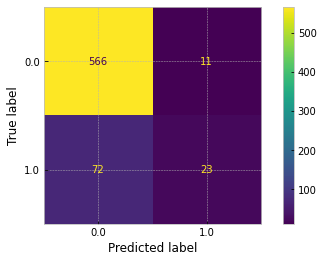

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred_randomf))

#Ploteo la Matriz
plt.rcParams['figure.figsize'] = (8, 4)
plot_confusion_matrix(random_forest , x_test, y_test)
plt.show()

In [ ]:
# Ahora calculo la precision
print(f" La precisión es de : {round(precision_score(y_test, y_test_pred_randomf)*100,2)}%")

 La precisión es de : 67.65%


In [ ]:
# Recall
print(f"La recall es de: {round(recall_score(y_test, y_test_pred_randomf)*100,2)}%")

La recall es de: 24.21%


In [ ]:
# Calculo el F1 score
print(f"El puntaje F1 Score es de: {round(f1_score(y_test, y_test_pred_randomf)*100,2)}%")

El puntaje F1 Score es de: 35.66%


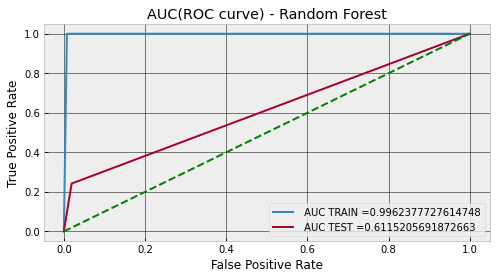

In [ ]:
#Calculo la CURVA - ROC
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_randomf)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_randomf)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) - Random Forest")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**Conclusión Random Forest:**

En el set de evaluación la accuracy fue de 87.65%, siendo poco menos de 1 (un) punto porcentual mayor al obtenido en el árbol de decisión. En el de entrenamiento había sido de 99.36%, por lo cual se ve claramente el overfitting.

En cuanto a la precisión, que es la proporción de identificaciones positivas que fue realmente correcta (TP/(TP+FP)) fue del 67.65%, superando por 8,27 p.p. al obtenido en el árbol de decisión. Asimismo, la proporción de positivos reales se que identificaron correctamente 'Recall' (TP/(TP+FN)) fue del 24.21% (4,21 p.p. superior). El score F1 (2TP/(2TP+FP*FN)) que brinda una medida de precisión y robustez del modelo, arrojó un 35,66% (5.74 p.p. superior). Para finalizar, la AUC se incrementó a 0.61, alejándose un poco más del 0.50 que significaría que el modelo no tienen ninguna capacidad de separación de clases.

Hasta aquí Random Forest ha evidenciado claramente mejores métricas que el modelo de Árbol de Decisión. No obstante ello, considero que continúan siendo insuficientes para lograr un modelo confiable y robusto.

##KNN (K-Nearest Neighbor)

In [ ]:
# Creo el modelo KNN con n_neighbors=100 y lo fiteo
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [ ]:
# Predicción
y_train_pred_knn= knn.predict(x_train)
y_test_pred_knn= knn.predict(x_test)

In [ ]:
#Calculo el accuracy en Test
train_accuracy_knn  = round(accuracy_score(y_train, y_train_pred_knn)*100,2)
test_accuracy_knn  = round(accuracy_score(y_test, y_test_pred_knn)*100,2)
print('Aciertos sobre el set de entrenamiento:',train_accuracy_knn,'%')
print('Aciertos sobre el set de evaluación:',test_accuracy_knn,'%')

Aciertos sobre el set de entrenamiento: 85.01 %
Aciertos sobre el set de evaluación: 86.16 %


[[577   0]
 [ 93   2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


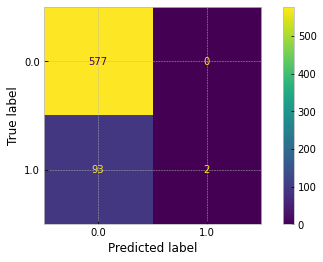

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred_knn))

#Ploteo la Matriz
plt.rcParams['figure.figsize'] = (8, 4)
plot_confusion_matrix(knn , x_test, y_test)
plt.show()

In [ ]:
# Ahora calculo la precision
print(f" La precisión es de : {round(precision_score(y_test, y_test_pred_knn)*100,2)}%")

 La precisión es de : 100.0%


In [ ]:
# Recall
print(f"La recall es de: {round(recall_score(y_test, y_test_pred_knn)*100,2)}%")

La recall es de: 2.11%


In [ ]:
# Calculo el F1 score
print(f"El puntaje F1 Score es de: {round(f1_score(y_test, y_test_pred_knn)*100,2)}%")

El puntaje F1 Score es de: 4.12%


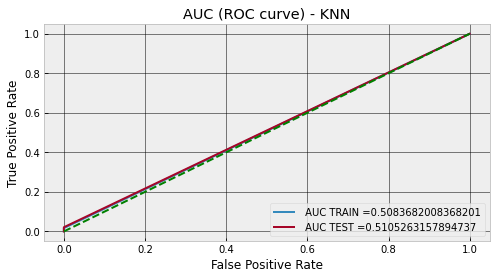

In [ ]:
#Calculo la CURVA - ROC
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_knn)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_knn)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC (ROC curve) - KNN")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**Conclusión KNN:**

En el set de evaluación la accuracy fue de 86.16%, siendo inferior al del arbol de decisión y random forest. En el set de entrenamiento el accuracy fue de 85.01, por lo cual se visualiza que ajustando un poco por debajo en este caso. 

Vale destacar que la precisión, que es la proporción de identificaciones positivas que fue realmente correcta (TP/(TP+FP)) fue del 100%. No obstante ello, la proporción de positivos reales se que identificaron correctamente fue únicamente del 2.11%. En la misma senda que el 'recall', el score F1 fue de un 4,12%. Asimismo, el AUC es de 0.51

Los resultados obtenidos no han sido buenos, ya que si bien el accuracy y la precisión han sido muy buenas, elmodelo no tiene la capacidad de detectar positivos reales, ni de separación de clases.

Prosigo analizando otros modelos, siendo que hasta acá RandomForest ha sido quien mejores métricas ha arrojado. 


##Regresión logística

In [ ]:
#Creo el modelo, fiteo y realizo la predicción
regresion_logistica = LogisticRegression() 
regresion_logistica.fit(x,y) 
y_train_pred_reg= regresion_logistica.predict(x_train)
y_test_pred_reg= regresion_logistica.predict(x_test)
train_accuracy_reg  = round(accuracy_score(y_train, y_train_pred_reg)*100,2)
test_accuracy_reg  = round(accuracy_score(y_test, y_test_pred_reg)*100,2)
print('Aciertos sobre el set de entrenamiento:',train_accuracy_reg,'%')
print('Aciertos sobre el set de evaluación:',test_accuracy_reg,'%')

Aciertos sobre el set de entrenamiento: 89.6 %
Aciertos sobre el set de evaluación: 89.58 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[564  13]
 [ 57  38]]


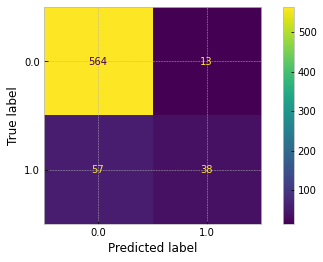

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred_reg))

#Ploteo la Matriz
plt.rcParams['figure.figsize'] = (8, 4)
plot_confusion_matrix(regresion_logistica , x_test, y_test)
plt.show()

In [ ]:
# Ahora calculo la precision
print(f" La precisión es de : {round(precision_score(y_test, y_test_pred_reg)*100,2)}%")

 La precisión es de : 74.51%


In [ ]:
# Recall
print(f"La recall es de: {round(recall_score(y_test, y_test_pred_reg)*100,2)}%")

La recall es de: 40.0%


In [ ]:
# Calculo el F1 score
print(f"El puntaje F1 Score es de: {round(f1_score(y_test, y_test_pred_reg)*100,2)}%")

El puntaje F1 Score es de: 52.05%


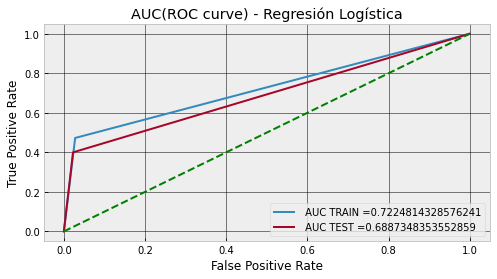

In [ ]:
#Calculo la CURVA - ROC
train_fpr_reg, train_tpr_reg, tr_thresholds_reg = roc_curve(y_train, y_train_pred_reg)
test_fpr_reg, test_tpr_reg, te_thresholds_reg = roc_curve(y_test, y_test_pred_reg)

plt.grid()

plt.plot(train_fpr_reg, train_tpr_reg, label=" AUC TRAIN ="+str(auc(train_fpr_reg, train_tpr_reg)))
plt.plot(test_fpr_reg, test_tpr_reg, label=" AUC TEST ="+str(auc(test_fpr_reg, test_tpr_reg)))
plt.plot([0,1],[0,1],'g--')
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) - Regresión Logística")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**Conclusión Regresión Logística:**

En el set de evaluación la accuracy fue de 89.68, hasta aquí quien ha mostrado mejor perfomance en esta métrica, siendo 1.93 puntos porcentuales superior al obtenido que en random forest. En el set de entrenamiento el accuracy fue prácticamente el mismo, por lo cual se visualiza un correcto balance de las performances en ambos, sin over ni underfitting.

En cuanto a la precisión, que es la proporción de identificaciones positivas que fue realmente correcta (TP/(TP+FP)) fue del 74.51%, superando por 8.86 p.p. al obtenido en RandomForest. Asimismo, la proporción de positivos reales se que identificaron correctamente fue del 40.0% (15,79 p.p. superior). El score F1 (2TP/(2TP+FP*FN)) que brinda una medida de precisión y robustez del modelo, arrojó un 52.05% (16.39 p.p. superior). Para finalizar, la AUC se incrementó a 0.69.

Hasta aquí el modelo creado en base a la Regresión Logística con el dataset normalizado ha sido quien ha evidenciado las métricas con mejor performance. 

##SVC (Support Vector Classification)

In [ ]:
#Creo el modelo, fiteo y realizo la preddición 
svc= SVC(C = 100, kernel = 'linear', random_state=123, gamma='auto')
svc.fit(x_train, y_train)
y_train_pred_svc = svc.predict(x_train)
y_test_pred_svc = svc.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train_accuracy_svc  = round(accuracy_score(y_train, y_train_pred_svc)*100,2)
test_accuracy_svc  = round(accuracy_score(y_test, y_test_pred_svc)*100,2)
print('Aciertos sobre el set de entrenamiento:',train_accuracy_svc,'%')
print('Aciertos sobre el set de evaluación:',test_accuracy_svc,'%')

Aciertos sobre el set de entrenamiento: 89.92 %
Aciertos sobre el set de evaluación: 88.39 %


[[560  17]
 [ 61  34]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


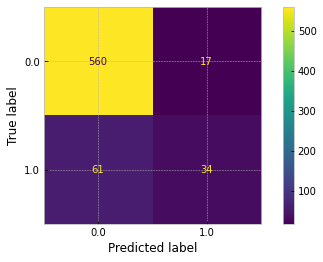

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred_svc))

#Ploteo la Matriz
plt.rcParams['figure.figsize'] = (8, 4)
plot_confusion_matrix(svc , x_test, y_test)
plt.show()

In [ ]:
# Ahora calculo la precision
print(f" La precisión es de : {round(precision_score(y_test, y_test_pred_svc)*100,2)}%")

 La precisión es de : 66.67%


In [ ]:
# Recall
print(f"La recall es de: {round(recall_score(y_test, y_test_pred_svc)*100,2)}%")

La recall es de: 35.79%


In [ ]:
# Calculo el F1 score
print(f"El puntaje F1 Score es de: {round(f1_score(y_test, y_test_pred_svc)*100,2)}%")

El puntaje F1 Score es de: 46.58%


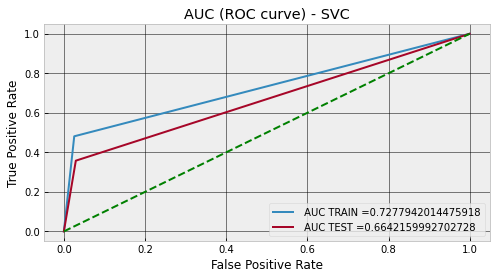

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_svc)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_svc)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC (ROC curve) - SVC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**Conclusión SVC:**

En el set de evaluación la accuracy fue de 88.39%, la segunda mejor performance en esta métrica luego de la regresión logística. Se visualiza un leve underfitting en este modelo ya que el accuracy en el set de entrenamiento había sido de 89.92%.

En cuanto a la precisión, que es la proporción de identificaciones positivas que fue realmente correcta (TP/(TP+FP)) fue del 66.67%, solo por encima del árbol de decisión. Por el lado de la proporción de positivos reales se que identificaron correctamente fue del 35.79%, ubicándose nuevamente como la segunda mejor métrica luego de la regresión. También así el score F1 (2TP/(2TP+FP*FN)) que brinda una medida de precisión y robustez del modelo, arrojando un 46.58% y el AUC se con 0.66.

Por las métricas analizadas, se observa con claridad que el SVC se ubica como el segundo mejor modelo, solo por detrás de la Regresión Logística. Si bien en la precisión se ve superado por otros modelos, en los restantes posee un mejor rendimiento. 

##Conclusiones iniciales de los modelos expuestos:

En base a las métricas analizadas previamente, se destaca la Regresión Logística como el modelo más solido hasta el momento. Seguidamente se encuentra SVC, que si bien la precisión se ve superado por otros modelos, en los restantes posee un mejor rendimiento. Y completando el top 3 estaría RandomForest. 

Cabe aclarar que, estas interpretaciones previas son consecuencia de ciertos hiperparámetros y variables incluidas inicialmente en el análisis, y que a continuación procederé a trabajar sobre 'Regresión Logística' debido a que fue la que mejores resultados arrojó, con el objetivo de lograr una mejora en su performance.

# **Mejoras aplicadas sobre Regresión Logística**

A continuación aplicaré diversas técnicas y pruebas para lograr una mejora en las métricas del modelo de Regresión Logística, ya que fue aquel que logró mejor performance entre todos los modelos analizados.

## Trabajo con los hiperparámetros 'class_weight', 'solver' y 'penalty'.

In [ ]:
#Cuento la cantidad de 0 y 1 en Response para entender una posible causa del bajo 'recall' obtenido
count_response = pd.value_counts(df_final['Response'], sort = True)
count_response

0.0    1906
1.0     334
Name: Response, dtype: int64

**En el hiperparámetro 'class_weight' le colocaré "balanced**", con el objetivo de que el algoritmo se encargue de equilibrar a la clase minoritaria (Response=1) durante el entrenamiento, y así intentar obener un mejor 'recall'. Eso significaría una mejor identificación de los clientes que efectivamente aceptaron la última campaña de marketing (variable target 'response'), actuando puntualmente sobre los Falsos Negativos, que quizás en el modelo se ven afectados por una menor cantidad de casos Response=1 en el dataset, y que por ende el modelo no logra aprender correctamente de ellos como para luego ser más certeros en el Test.

###Pruebas manuales

In [ ]:
#Creo el modelo, fiteo y realizo la predicción sobre 'x' e 'y' con class_weight='balanced'
regresion_logistica_balanced = LogisticRegression(class_weight='balanced')
regresion_logistica_balanced.fit(x_train, y_train)
y_test_pred_reg_balanced= regresion_logistica_balanced.predict(x_test)

#Métricas
test_fpr_reg_balanced, test_tpr_reg_balanced, te_thresholds_reg_balanced = roc_curve(y_test, y_test_pred_reg_balanced)
print(f"El accuracy actual es de: {round(accuracy_score(y_test, y_test_pred_reg_balanced)*100,2)}%", "vs",test_accuracy_reg,'% obtenido inicialmente')
print(f"La precisión actual es de: {round(precision_score(y_test, y_test_pred_reg_balanced)*100,2)}%", "vs",round(precision_score(y_test, y_test_pred_reg)*100,2),'% obtenido inicialmente')
print(f"La recall actual es de: {round(recall_score(y_test, y_test_pred_reg_balanced)*100,2)}%", "vs",round(recall_score(y_test, y_test_pred_reg)*100,2),'% obtenido inicialmente')
print(f"El puntaje F1 Score actual es de: {round(f1_score(y_test, y_test_pred_reg_balanced)*100,2)}%", "vs",round(f1_score(y_test, y_test_pred_reg)*100,2),'% obtenido inicialmente')
print(f"El AUC actual es de: {round(auc(test_fpr_reg_balanced, test_tpr_reg_balanced)*100,2)}%", "vs",round(auc(test_fpr_reg, test_tpr_reg)*100,2),'% obtenido inicialmente')

El accuracy actual es de: 82.14% vs 89.58 % obtenido inicialmente
La precisión actual es de: 42.42% vs 74.51 % obtenido inicialmente
La recall actual es de: 73.68% vs 40.0 % obtenido inicialmente
El puntaje F1 Score actual es de: 53.85% vs 52.05 % obtenido inicialmente
El AUC actual es de: 78.61% vs 68.87 % obtenido inicialmente


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Conclusión:**

Se observa una merma en el accuracy de aproximadamente 7.5 pp, como así también una disminución de la precisión en torno a los 32 pp. No obstante ello, se logró un fuerte aumento de 33.68 pp en el 'recall' (73.68%) que era lo que estaba persiguiendo con esta prueba, como así también de la AUC que ascendió notablemente a 78.61%, incrementándose en casi 10 pp. Asimismo, el F1 Score aumentó 1.80 pp.

Ahora bien, buceando por https://scikit-learn.org/ visualizo que elegir 'liblinear' para el hiperparámetro 'solver' es una buena opción para datasets pequeños. Por lo cual, intentaré a continuación incorporarlo para corroborar su perfomance. 
Asimismo, la documentación informa que este hiperparámetro está ligado con el 'penalty' elegido, por default viene 'l2'. En el caso de 'liblinear' soporta 'l1' o 'l2', por lo cual luego probaré 'l1'.

In [ ]:
#Introduzco el solver='liblinear',penalty='l2'

regresion_logistica_balanced2 = LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l2')
regresion_logistica_balanced2.fit(x_train, y_train)
y_test_pred_reg_balanced2= regresion_logistica_balanced2.predict(x_test)

#Métricas
test_fpr_reg_balanced2, test_tpr_reg_balanced2, te_thresholds_reg_balanced2 = roc_curve(y_test, y_test_pred_reg_balanced2)
print(f"El accuracy actual es de: {round(accuracy_score(y_test, y_test_pred_reg_balanced2)*100,2)}%")
print(f"La precisión actual es de: {round(precision_score(y_test, y_test_pred_reg_balanced2)*100,2)}%")
print(f"La recall actual es de: {round(recall_score(y_test, y_test_pred_reg_balanced2)*100,2)}%")
print(f"El puntaje F1 Score actual es de: {round(f1_score(y_test, y_test_pred_reg_balanced2)*100,2)}%")
print(f"El AUC actual es de: {round(auc(test_fpr_reg_balanced2, test_tpr_reg_balanced2)*100,2)}%")


El accuracy actual es de: 82.44%
La precisión actual es de: 42.94%
La recall actual es de: 73.68%
El puntaje F1 Score actual es de: 54.26%
El AUC actual es de: 78.78%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Conclusión:**

Excepto 'recall' que se mantiene igual, el resto de las métricas se ven incrementadas entre 0.30 y 0.55 puntos porcentuales, por lo cual incluir solver='liblinear' se posiciona como un buen agregado al modelo.

In [ ]:
#Mantengo solver='liblinear' pero cambio por penalty='l1'.

regresion_logistica_balanced3 = LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1')
regresion_logistica_balanced3.fit(x_train, y_train)
y_test_pred_reg_balanced3= regresion_logistica_balanced3.predict(x_test)

#Métricas
test_fpr_reg_balanced3, test_tpr_reg_balanced3, te_thresholds_reg_balanced3 = roc_curve(y_test, y_test_pred_reg_balanced3)
print(f"El accuracy actual es de: {round(accuracy_score(y_test, y_test_pred_reg_balanced3)*100,2)}%")
print(f"La precisión actual es de: {round(precision_score(y_test, y_test_pred_reg_balanced3)*100,2)}%")
print(f"La recall actual es de: {round(recall_score(y_test, y_test_pred_reg_balanced3)*100,2)}%")
print(f"El puntaje F1 Score actual es de: {round(f1_score(y_test, y_test_pred_reg_balanced3)*100,2)}%")
print(f"El AUC actual es de: {round(auc(test_fpr_reg_balanced2, test_tpr_reg_balanced3)*100,2)}%")

El accuracy actual es de: 82.89%
La precisión actual es de: 43.67%
La recall actual es de: 72.63%
El puntaje F1 Score actual es de: 54.55%
El AUC actual es de: 78.26%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Conclusión:**

Comparando con los resultados obtenidos con penalty = 'l2' se visualiza una merma en 'recall' y 'AUC', en contraposición con las restantes métricas que se vieron incrementadas.

**Por ende, se observa una mejor performance en la métrica 'recall' con class_weight='balanced', solver='liblinear' y penalty='l2'.**

**Específicamente apunto a mejorar esta métrica ya que es aquella que me permite identificar de mejor manera a los clientes con alta probabilidad de aceptar nuestras campañas de marketing. Si bien se ven afectadas el accuracy y la precisión al haber una mayor proporción de falsos positivos (clientes que predice como response=1 pero no lo son), priorizo que el modelo los incluya, en pos de disminuir los falsos negativos y que queden por fuera de nuestras próximas campañas de marketing.**

###Aplico GridSearchCV para obtener el class_weight, solver y penalty con mayor recall

Si bien había obtenido manualmente class_weight='balanced', solver='liblinear'y penalty='l2' como aquellos que arrojaban mejor recall. Ahora lo comprobaré a través de un GridSearchCV.

In [ ]:
# Importo las librerías necesarias y efectúo la búsqueda por grid search con validación cruzada
# Utilizo make_scorer para transformar a 'recall' como el parámetro que determine cuáles son los mejores parámetros del grid.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
import multiprocessing

grid = GridSearchCV(
        estimator  = LogisticRegression(),
        param_grid = {'class_weight': ['balanced', None], 'solver': ['lbfgs', 'liblinear','sag'],'penalty':['l1','l2']},
        scoring    = make_scorer(recall_score),
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = x_train, y = y_train)

In [ ]:
# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_class_weight,param_penalty,param_solver,mean_test_score,std_test_score,mean_train_score,std_train_score
1,balanced,l1,liblinear,0.797359,0.022166,0.834799,0.006446
3,balanced,l2,lbfgs,0.793253,0.032370,0.832597,0.009212
5,balanced,l2,sag,0.793253,0.032370,0.832597,0.009212


In [ ]:
# Hiperparámetros óptimos por validación cruzada
print('Hiperparámetros optimos según Recall por CV')
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Hiperparámetros optimos según Recall por CV
{'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'} : 0.7973588859549173 make_scorer(recall_score)


In [ ]:
#Guardo nuestros hiperparámetros finales
reg_grid=grid.best_estimator_
y_pred_reg_grid = reg_grid.predict(X = x_test)

#Métricas
test_fpr_reg_grid, test_tpr_reg_grid, te_thresholds_reg_grid = roc_curve(y_test, y_pred_reg_grid)
print(f"El accuracy actual es de: {round(accuracy_score(y_test, y_pred_reg_grid)*100,2)}%")
print(f"La precisión actual es de: {round(precision_score(y_test, y_pred_reg_grid)*100,2)}%")
print(f"La recall actual es de: {round(recall_score(y_test, y_pred_reg_grid)*100,2)}%")
print(f"El puntaje F1 Score actual es de: {round(f1_score(y_test, y_pred_reg_grid)*100,2)}%")
print(f"El AUC actual es de: {round(auc(test_fpr_reg_grid, test_tpr_reg_grid)*100,2)}%")

El accuracy actual es de: 82.89%
La precisión actual es de: 43.67%
La recall actual es de: 72.63%
El puntaje F1 Score actual es de: 54.55%
El AUC actual es de: 78.6%


**Conclusión:**

Tomando la métrica 'recall' como variable 'scoring' y utilizando GridSearCV visualizo que en las 3 mejores combinaciones posibles se encuentra class_weight=balanced. Asimismo, en 'solver' arroja 'liblinear' como el de mejor performance, hasta aquí ambos hiperparámetros con iguales resultados que las pruebas manuales realizadas. No obstante ello, con CV el penalty con mejor estimación fue con 'l1' a diferencia del cálculo manual que había sido 'l2'.

Respecto a las métricas obtenidas manualmente con penalty = l2, se observa un accuracy superior en 0.45 pp, como también la precisión en 0.73 pp y F1 Score 0.29 pp; pero una merma en recall de casi un 1 pp y en AUC de 0.12. 


**Los resultados obtenidos mediante GridSearcCV confirman que debo utilizar class_weight=balanced y solve=liblinear. Respecto a penalty no es concluyente ya que difiere de la mayor performance en recall obtenido manualmente, pero que opto por manener con 'l2'.**

##Aplicamos 'XGBoost'

Pruebo con el 'Extreme Gradient Boosting' con el objetivo académico de aplicar al menos un modelo de Boosting sobre el dataset, corroborando su comportamiento y perfomance.

In [ ]:
#!pip install xgboost
import xgboost as xgb 

In [ ]:
#Llamo al modelo, entreno y predigo.
#Utilizo objective='reg:logistic'
#Asimismo, utilizo 'scale_pos_weight' para dataset desbalanceados, tomando como parámetro los 1906 y 334 registros según hayan sido response=0 o response=1 (sum(negative instances) / sum(positive instances)).

clf_xgb = xgb.XGBClassifier(objective='reg:logistic',scale_pos_weight=(1906/334))
clf_xgb.fit(x_train,y_train) #Entreno el modelo
y_test_pred_xgb = clf_xgb.predict(x_test) #Prediccion en Test

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Métricas
test_fpr_xgb, test_tpr_xgb, te_thresholds_xgb = roc_curve(y_test, y_test_pred_xgb)
print(f"El accuracy actual es de: {round(accuracy_score(y_test, y_test_pred_xgb)*100,2)}%")
print(f"La precisión actual es de: {round(precision_score(y_test, y_test_pred_xgb)*100,2)}%")
print(f"La recall actual es de: {round(recall_score(y_test, y_test_pred_xgb)*100,2)}%")
print(f"El puntaje F1 Score actual es de: {round(f1_score(y_test, y_test_pred_xgb)*100,2)}%")
print(f"El AUC actual es de: {round(auc(test_fpr_xgb, test_tpr_xgb)*100,2)}%")

El accuracy actual es de: 84.82%
La precisión actual es de: 47.41%
La recall actual es de: 67.37%
El puntaje F1 Score actual es de: 55.65%
El AUC actual es de: 77.53%


**Conclusión:**

Si comparamos con el modelo LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l2'), se observa un accuracy superior en casi 2.5 pp, como así también una precisión mayor en aprox 4.5  y la AUC en 1.25 pp. No obstante ello, el recall se ve afectado en más de 6 pp, al igual que el F1 Score en más de 1.3 pp.

La prueba arroja interesantes métricas, pero ya que busco un mayor recall no es satisfactoria.

## Principal Component Analysis (PCA)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


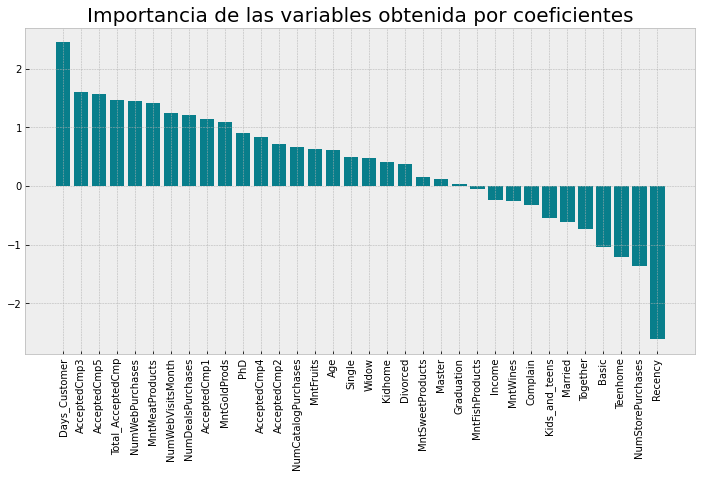

In [ ]:
#https://ichi.pro/es/3-formas-esenciales-de-calcular-la-importancia-de-las-caracteristicas-en-python-52301047341397

#Grafico la importancia de las variables según los coeficientes de pca. 
regresion_logistica_pca = LogisticRegression()
regresion_logistica_pca.fit(x_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': regresion_logistica_pca.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Importancia de las variables obtenida por coeficientes', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Conclulsión:**

En este gráfico se puede ver las variables que más influencia tienen en la predicción, a través de los fuertes coeficientes tanto en dirección positiva como negativa. 

Por ejemplo, la antigüedad del cliente (days_customer) es un coeficiente positivo de gran importancia para el modelo, como así también las variables de aceptación de campañas previas (AcceptedCmp3, AcceptedCmp5, etc). Respecto a los coeficientes negativos, se visualiza como la variable relacionada a la cantidad de días desde la última compra también tiene una fuerte incidencia sobre el modelo. En este caso se traduce como que aquellos clientes con menor cantidad de días desde la última compra (menor 'Recency') son mas propensos a aceptar la campaña de marketing (response=1).

Luego aquellas variables con coeficientes cercanos a '0' (cero), serían las que no aportan mucho a mi modelo, y de las cuales podría prescindir. 

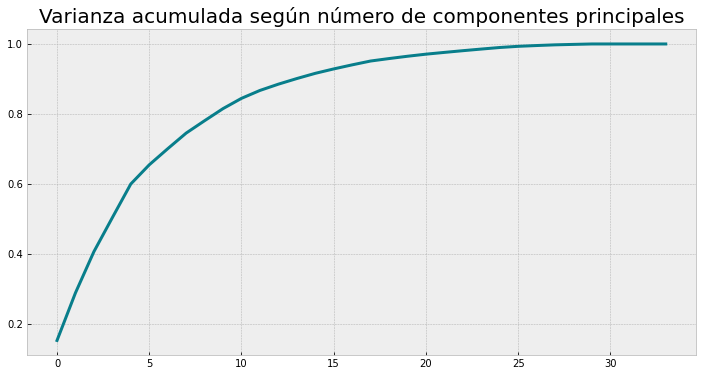

In [ ]:
# Grafico la varianza acumulada según el número de componentes principales
from sklearn.decomposition import PCA
pca_x_train = PCA().fit(x_train)

plt.figure(figsize=(12, 6))
plt.plot(pca_x_train.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Varianza acumulada según número de componentes principales', size=20)
plt.show()

**Conclusión:** 

Esto significa que aproximadamente se puede explicar el 80% de la varianza en su conjunto de datos de origen con los primeros 8 (ocho) componentes principales. O si voy más alla, el 90% sería con los 12/13 componentes principales. Asimismo, se observa que el punto máximo pareciera estar entre los 28 y 30 componentes, siendo que luego se mantiene costante. 

###Prueba manual de reducción de la dimensionalidad

A partir de lo observado en el primer gráfico de este apartado, procedo a crear un nuevo dataset 'x' para eliminar ciertas variables para evaluar las métricas resultantes. 

In [ ]:
#Copio dataset df_final y 
x_reduc = x.copy()
x_reduc.head(1)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_AcceptedCmp,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,0.351086,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#Elimino variables con coeficientes bajos: 
x_reduc.drop(['MntFishProducts', 'MntSweetProducts'], axis=1, inplace=True)

In [ ]:
# Hago el split y me quedo con 30% para test y un 70% para train
x_reduc_train, x_reduc_test, y_train, y_test = train_test_split(x_reduc, y, test_size=0.30, random_state=42) 

In [ ]:
#Creo el modelo, fiteo y predigo
regresion_logistica_reduc = LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l2')
regresion_logistica_reduc.fit(x_reduc_train, y_train)
y_test_pred_reg_bce_reduc= regresion_logistica_reduc.predict(x_reduc_test)

#Métricas
test_fpr_reg_bce_reduc, test_tpr_reg_bce_reduc, te_thresholds_reg_bce_reduc = roc_curve(y_test, y_test_pred_reg_bce_reduc)
print(f"El accuracy actual es de: {round(accuracy_score(y_test, y_test_pred_reg_bce_reduc)*100,2)}%")
print(f"La precisión actual es de: {round(precision_score(y_test, y_test_pred_reg_bce_reduc)*100,2)}%")
print(f"La recall actual es de: {round(recall_score(y_test, y_test_pred_reg_bce_reduc)*100,2)}%")
print(f"El puntaje F1 Score actual es de: {round(f1_score(y_test, y_test_pred_reg_bce_reduc)*100,2)}%")
print(f"El AUC actual es de: {round(auc(test_fpr_reg_bce_reduc, test_tpr_reg_bce_reduc)*100,2)}%")

El accuracy actual es de: 82.59%
La precisión actual es de: 43.04%
La recall actual es de: 71.58%
El puntaje F1 Score actual es de: 53.75%
El AUC actual es de: 77.99%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Conclusión:**

Luego de aplicar varias combinaciones distintas eliminando variables con bajos coeficientes (o variables que a priori una podría explicar la otra, ej: Total_Acceptedcmp vs. AcceptedCmp1, AcceptedCmp2,etc), ninguna ha arrojado mejores métricas que las obtenidas previamente, incluso disminuyen paulatinamente con cada variable dejada de lado, por lo cual se desestima esta posibilidad.

### Aplicamos GridSearchCV para obtener pca__n_components

Aplicao GridSearchCV utilizando los hiperparámetros probados previamente (y manualmente): class_weight='balanced', solver='liblinear', penalty='l2', con el objetivo de corroborar el número óptimo de componentes principales. Tomo como 'scoring' a 'recall' ya que busco la mayor performance específicamente en esta métrica. 

In [ ]:
#https://www.cienciadedatos.net/documentos/py19-pca-python.html

from sklearn.pipeline import make_pipeline
pipe_modelado = make_pipeline(PCA(), LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l2'))
pipe_modelado.fit(X=x_train, y=y_train)

# Grid de hiperparámetros evaluados
param_grid2 = {'pca__n_components': [6, 10, 14, 18, 22, 26, 30, 34]}

# Búsqueda por grid search con validación cruzada
grid2 = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid2,
        scoring    = make_scorer(recall_score),
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid2.fit(X = x_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid2.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


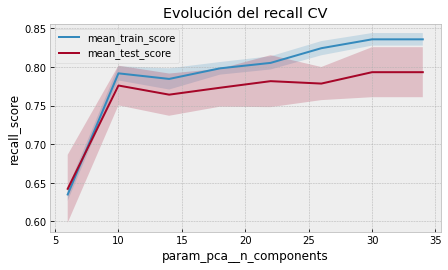

In [ ]:
# Gráfico resultados validación cruzada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)
resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del recall CV')
ax.set_ylabel('recall_score');

In [ ]:
# Óptimo 'pca__n_components' por validación cruzada
print("Óptimo 'pca__n_components' según Recall por CV")
print(grid2.best_params_, ":", grid2.best_score_, grid2.scoring)

Óptimo 'pca__n_components' según Recall por CV
{'pca__n_components': 30} : 0.7932527068142238 make_scorer(recall_score)


In [ ]:
# Tranformo 'x' train y test con N° de componentes principales =30 según lo obtenido en el GridSearchCV
# Fiteo, realizo la predicción y observo las métricas de nuestro modelo de regresión logística resultante
pca = PCA(n_components=30)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

pipe_modelado = make_pipeline(pca, LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l2'))
pipe_modelado.fit(X=x_train_pca, y=y_train)
y_test_pred_reg_pca= pipe_modelado.predict(x_test_pca)

#Métricas
test_fpr_reg_pca, test_tpr_reg_pca, te_thresholds_reg_pca = roc_curve(y_test, y_test_pred_reg_pca)
print(f"El accuracy actual es de: {round(accuracy_score(y_test, y_test_pred_reg_pca)*100,2)}%")
print(f"La precisión actual es de: {round(precision_score(y_test, y_test_pred_reg_pca)*100,2)}%")
print(f"La recall actual es de: {round(recall_score(y_test, y_test_pred_reg_pca)*100,2)}%")
print(f"El puntaje F1 Score actual es de: {round(f1_score(y_test, y_test_pred_reg_pca)*100,2)}%")
print(f"El AUC actual es de: {round(auc(test_fpr_reg_pca, test_tpr_reg_pca)*100,2)}%")

El accuracy actual es de: 82.14%
La precisión actual es de: 42.42%
La recall actual es de: 73.68%
El puntaje F1 Score actual es de: 53.85%
El AUC actual es de: 78.61%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Conclusión:**

Al aplicar GridSearchCV para obtener el número óptimo de componentes principales, arroja el número de 30, lo cual además se puede observar en el gráfico expuesto. A través de CV el recall ascendería a 79,32%.

Si quisiera reentrenar mi modelo aplicando los 30 componentes principales con validación simple,  y comparo con el modelo manual obtenido por LogisticRegression (class_weight='balanced',solver='liblinear',penalty='l2'), se observan leves disminuciones en todas las métricas, excepto por 'recall' que se mantuvo constante. 

##Aplicamos StratifiedKFold

Ya habiendo determinado los hiperparámetros que uitlizaremos mediante un train_test_split de 70/30 de validación simple, procederé a utilizar StratifiedKFold para evaluar su desempeño:

In [ ]:
from sklearn.model_selection import StratifiedKFold
#Convierto 'x' e 'y' para poder trabajar con ellas 
x_2=x.to_numpy()
y_2=y.to_numpy()

In [ ]:
#StratifiedKFold - Train y Test
skf_car = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
train, test = list(skf_car.split(x_2, y_2))[0]
x_train_skfold = x_2[train]
x_test_skfold = x_2[test]
y_train_skfold = y_2[train]
y_test_skfold= y_2[test]

In [ ]:
#Entreno la regresión con los hiperparámetros ya probados y realizo la predicción, pero esta vez con StratifiedKFold
regression_car = LogisticRegression()
cv_car = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
tunner_car_regression = GridSearchCV(estimator=regression_car, param_grid={'class_weight': ['balanced'], 'solver': ['liblinear'],'penalty':['l2']}, cv=cv_car)
_=tunner_car_regression.fit(x_train_skfold, y_train_skfold)
y_predict_regression_skfold= tunner_car_regression.predict(x_test_skfold)

In [ ]:
#Métricas
test_fpr_reg_strkfold, test_tpr_reg_strkfold, te_thresholds_reg_strkfold = roc_curve(y_test_skfold, y_predict_regression_skfold)
print(f"El accuracy actual es de: {round(accuracy_score(y_test_skfold, y_predict_regression_skfold)*100,2)}%", "vs",round(accuracy_score(y_test, y_test_pred_reg_balanced2)*100,2),'% obtenido con 70/30 de validación simple')
print(f"La precisión actual es de: {round(precision_score(y_test_skfold, y_predict_regression_skfold)*100,2)}%", "vs",round(precision_score(y_test, y_test_pred_reg_balanced2)*100,2),'% obtenido con 70/30 de validación simple')
print(f"La recall actual es de: {round(recall_score(y_test_skfold, y_predict_regression_skfold)*100,2)}%", "vs",round(recall_score(y_test, y_test_pred_reg_balanced2)*100,2),'% obtenido con 70/30 de validación simple')
print(f"El puntaje F1 Score actual es de: {round(f1_score(y_test_skfold, y_predict_regression_skfold)*100,2)}%", "vs",round(f1_score(y_test, y_test_pred_reg_balanced2)*100,2),'% obtenido con 70/30 de validación simple')
print(f"El AUC actual es de: {round(auc(test_fpr_reg_strkfold, test_tpr_reg_strkfold)*100,2)}%", "vs",round(auc(test_fpr_reg_balanced2, test_tpr_reg_balanced2)*100,2),'% obtenido con 70/30 de validación simple')

El accuracy actual es de: 83.04% vs 82.44 % obtenido con 70/30 de validación simple
La precisión actual es de: 46.22% vs 42.94 % obtenido con 70/30 de validación simple
La recall actual es de: 82.09% vs 73.68 % obtenido con 70/30 de validación simple
El puntaje F1 Score actual es de: 59.14% vs 54.26 % obtenido con 70/30 de validación simple
El AUC actual es de: 82.65% vs 78.78 % obtenido con 70/30 de validación simple


**Conclusión:**

Mediante StratifiedKFold se observa una mejora notable de todos los indicadores al compararlos con aquellos obtenidos mediante el train_test_split de 70/30. El accuracy en test superó el 83%, la precisión se incrementó en 3.28 pp, el F1 Socre en 4.85 pp, el AUC 3.87 pp, y finalmente nuestro recall aumentó sustancialmente (+8.51 pp) superando la barrera del 82%.

# **Conclusión final:**

Luego de las pruebas efectuadas, llego a la conclusión de incluir a mi modelo de regresión logística el hiperparámetro 'class_weight' en "balanced", con el objetivo de que el algoritmo se encargue de equilibrar a la clase minoritaria (Response=1) en pos de obener un mejores positivos reales (recall). Eso se tradujo en una mejor identificación de los clientes que efectivamente aceptaron la última campaña de marketing, actuando puntualmente sobre los Falsos Negativos que anteriormente teníamos en gran cantidad, que seguramente mi modelo se veía afectado por la baja cantidad de casos Response=1 en el dataset, y que por ende mi modelo no lograba aprender correctamente de ellos como para luego ser más certeros en el Test.

Asimismo, incorporo 'liblinear' (buena opción para datasets pequeños según la documentación de scikit-learn) para el hiperparámetro 'solver' lo cual mejoró todas mis métricas. Asimismo, mantengo'penalty' por default que viene seteado en 'l2'. 

Con estas definiciones, las métricas obtenidas mediante validación simple evidenciaron una notable mejora del recall (+33.68 pp) y de la curva AUC (+9.91 pp). Asimismo, se incrementó el F1 Score en 2.19 pp, en detrimento del accuracy (- 7.14) y de la precisión (-31.57). De incorporar StratifiedKFold, este progreso se ve acentuado, con incrementos finales de 42.19 pp en recall, 13.78 pp en AUC, 7.04 pp en F1 Score, y menores mermas en accuracy y precisión respecto del cálculo de Regresión Logística inicial. 

Si bien estas últimas dos se ven afectadas fuertemente, considero apropiado priorizar el recall y AUC, a costa de que mi modelo considere muchos casos como response=1 aunque no lo sean, pero que identifique de mejor manera a todos aquellos positivos reales.

Cabe destacar, que puedo priorizar una métrica por sobre otra dado que el dataset involucra una temática en la cual no es 'grave' si mi modelo predice como positivo un caso que no lo es, ya que solo estoy tratando una campaña de marketing y no un tema de salud por ejemplo.


**Métricas finales:**

(con StratifiedKFold e hiperparámetros inlcuidos)

In [ ]:
test_fpr_reg_strkfold, test_tpr_reg_strkfold, te_thresholds_reg_strkfold = roc_curve(y_test_skfold, y_predict_regression_skfold)
print(f"El accuracy actual es de: {round(accuracy_score(y_test_skfold, y_predict_regression_skfold)*100,2)}%", "vs",test_accuracy_reg,'% obtenido inicialmente')
print(f"La precisión actual es de: {round(precision_score(y_test_skfold, y_predict_regression_skfold)*100,2)}%", "vs",round(precision_score(y_test, y_test_pred_reg)*100,2),'% obtenido inicialmente')
print(f"La recall actual es de: {round(recall_score(y_test_skfold, y_predict_regression_skfold)*100,2)}%", "vs",round(recall_score(y_test, y_test_pred_reg)*100,2),'% obtenido inicialmente')
print(f"El puntaje F1 Score actual es de: {round(f1_score(y_test_skfold, y_predict_regression_skfold)*100,2)}%", "vs",round(f1_score(y_test, y_test_pred_reg)*100,2),'% obtenido inicialmente')
print(f"El AUC actual es de: {round(auc(test_fpr_reg_strkfold, test_tpr_reg_strkfold)*100,2)}%", "vs",round(auc(test_fpr_reg, test_tpr_reg)*100,2),'% obtenido inicialmente')

El accuracy actual es de: 83.04% vs 89.58 % obtenido inicialmente
La precisión actual es de: 46.22% vs 74.51 % obtenido inicialmente
La recall actual es de: 82.09% vs 40.0 % obtenido inicialmente
El puntaje F1 Score actual es de: 59.14% vs 52.05 % obtenido inicialmente
El AUC actual es de: 82.65% vs 68.87 % obtenido inicialmente


[[317  64]
 [ 12  55]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


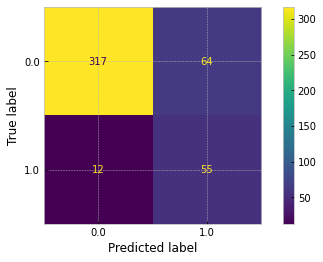

In [ ]:
print(confusion_matrix(y_test_skfold, y_predict_regression_skfold))
plt.rcParams['figure.figsize'] = (8, 4)
plot_confusion_matrix(tunner_car_regression , x_test_skfold , y_test_skfold)
plt.show()

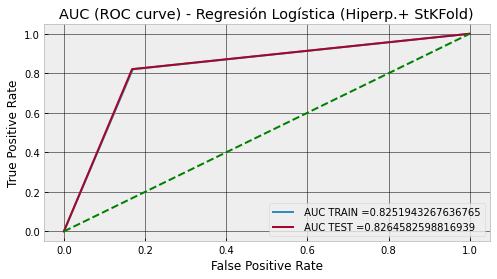

In [ ]:
y_train_pred_reg_skfold= tunner_car_regression.predict(x_train_skfold)
train_fpr_reg_strkfold, train_tpr_reg_strkfold, tr_thresholds_reg_strkfold = roc_curve(y_train_skfold, y_train_pred_reg_skfold)
test_fpr_reg_strkfold, test_tpr_reg_strkfold, te_thresholds_reg_strkfold = roc_curve(y_test_skfold, y_predict_regression_skfold)
plt.grid()

plt.plot(train_fpr_reg_strkfold, train_tpr_reg_strkfold, label=" AUC TRAIN ="+str(auc(train_fpr_reg_strkfold, train_tpr_reg_strkfold)))
plt.plot(test_fpr_reg_strkfold, test_tpr_reg_strkfold, label=" AUC TEST ="+str(auc(test_fpr_reg_strkfold, test_tpr_reg_strkfold)))
plt.plot([0,1],[0,1],'g--')
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC (ROC curve) - Regresión Logística (Hiperp.+ StKFold)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()